 ### Question 3

 Are there "groups" of countries that share characteristics among macroeconomic factors, and education rates among women, and/or women's rights in those countries? For example, do countries with greater rates of education among females and more equal rights among men and women have higher GDP or longer average lifespans?


 Target variable(s) from data set: N/A, this is an unsupervised learning question 
Task type: Clustering


In [1]:
#import packages

# general
import numpy as np
import pandas as pd

# sklearn

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, kmeans_plusplus
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from yellowbrick.features import PCA as PCA_viz
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
#load in the dataset
transformed_data = pd.read_csv('transformed_data.csv')
transformed_data.head()

Country Name Country Code  Year  \
0      Albania          ALB  -1.0   
1      Albania          ALB  -0.7   
2      Albania          ALB   0.1   
3      Albania          ALB   0.5   
4      Albania          ALB   0.6   

   A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                1.0              
1                                                1.0              
2                                                1.0              
3                                                1.0              
4                                                1.0              

   A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                1.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0                                 

   A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can register a business in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can sign a contract in the same way as a man (1=yes; 0=no)  ...  \
0                                                0.0                   ...   
1                                                0.0                   ...   
2                                                1.0                   ...   
3                                                1.0                   ...   
4                                                1.0                   ...   

   The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)  \
0                                                1.0                                                    
1                                                1.0                                                    
2                                                1.0                                                    
3                                                1.0                                                    
4

In [3]:
transformed_data.columns

Index(['Country Name', 'Country Code', 'Year',
       'A woman can be head of household in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       'A woman can work at night in the same way as a man (1=yes; 0=no)',
       'A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)',
       'A woman can work in an industrial job in the same way as a man (1=yes; 0=no)',
       'A woman has the same rights to remarry as 

In [4]:
# Drop column that isn't real data
# transformed_data = transformed_data.drop(columns=['Unnamed: 0'])

In [5]:
transformed_data

Country Name Country Code  Year  \
0                Albania          ALB  -1.0   
1                Albania          ALB  -0.7   
2                Albania          ALB   0.1   
3                Albania          ALB   0.5   
4                Albania          ALB   0.6   
...                  ...          ...   ...   
1066  West Bank and Gaza          PSE   0.8   
1067            Zimbabwe          ZWE   0.0   
1068            Zimbabwe          ZWE   0.1   
1069            Zimbabwe          ZWE   0.2   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                1.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                0.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1066                                                0.0              
1067                                                1.0              
1068                                                1.0              
1069                                                1.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1066                                 

In [6]:
# Initialize data for model in dataframe called X
X = transformed_data
# id_vars_names = X.columns[:53].tolist()

# # Melt dataframe and make "Country" variable label encoded
# # X = X.melt(id_vars=id_vars_names, var_name='Country',value_name='CountryY/N')

# X.loc[X['CountryY/N'] == 0, 'Country'] = np.nan

# # X = X.dropna(subset=['Country'])
# # X = X.drop(columns='CountryY/N')

# label_encoder = preprocessing.LabelEncoder() 

# # Update model data with new label encoded Country column 
# X['Country Label'] = label_encoder.fit_transform(X['Country']) 

# # Create separate dataframe not used for models that stores the Country Names
X_withCountry = X

# # Remove non-numeric Country column from data for model
X = X.drop(columns=['Country Name', 'Country Code'])
X

Year  \
0     -1.0   
1     -0.7   
2      0.1   
3      0.5   
4      0.6   
...    ...   
1066   0.8   
1067   0.0   
1068   0.1   
1069   0.2   
1070   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                1.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                0.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1066                                                0.0              
1067                                                1.0              
1068                                                1.0              
1069                                                1.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1066                                                0.0                                 
1067                                                0.0                                 
1068                                                0.0                                 
1069                                                0.0                                 
1070                                                0.0                

In [7]:
X_withCountry

Country Name Country Code  Year  \
0                Albania          ALB  -1.0   
1                Albania          ALB  -0.7   
2                Albania          ALB   0.1   
3                Albania          ALB   0.5   
4                Albania          ALB   0.6   
...                  ...          ...   ...   
1066  West Bank and Gaza          PSE   0.8   
1067            Zimbabwe          ZWE   0.0   
1068            Zimbabwe          ZWE   0.1   
1069            Zimbabwe          ZWE   0.2   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                1.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                0.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1066                                                0.0              
1067                                                1.0              
1068                                                1.0              
1069                                                1.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1066                                 

#### Data Exploration for potentially relevant variables

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

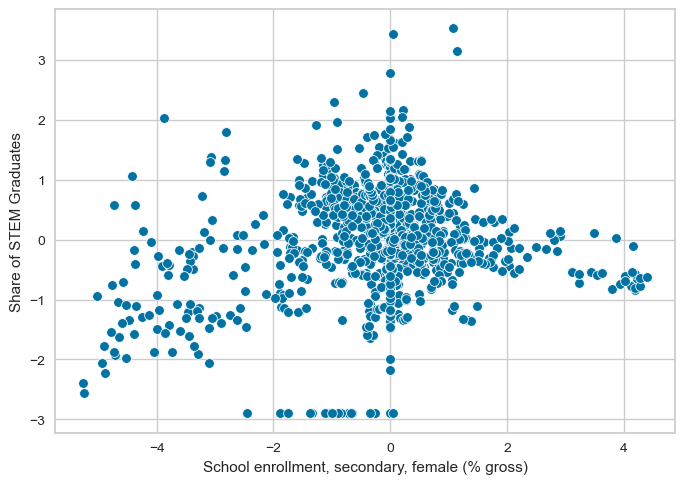

In [8]:
# Visualize School Enrollment for females in secondary school vs. Share of STEM graduates, which were variables of interest in question 1 + 2
sns.scatterplot(data=X, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates')

<Axes: xlabel='Fertility rate, total (births per woman)', ylabel='Length of paid parental leave for mother (calendar days)'>

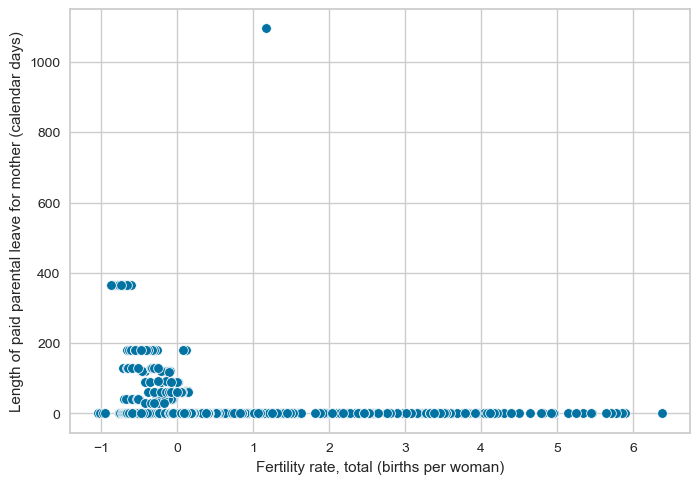

In [9]:
# Visualize two more variables with numeric data - Fertility rate and length of paid parental leave for mother
sns.scatterplot(data=X, x='Fertility rate, total (births per woman)', y='Length of paid parental leave for mother (calendar days)')

### Model 1: KMeans Clustering

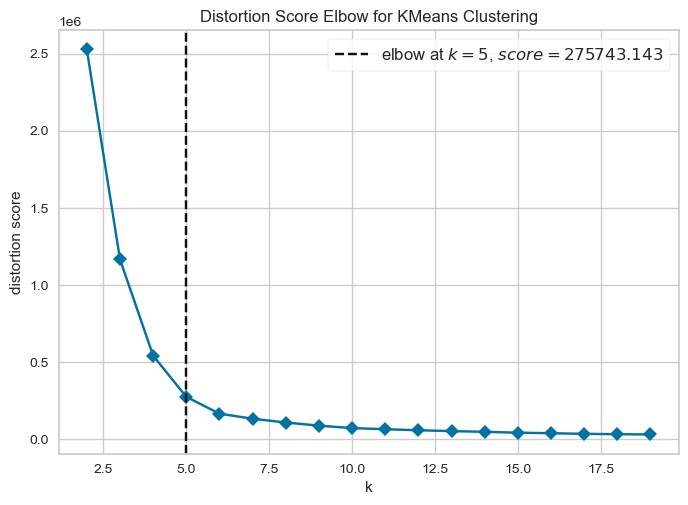

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#Create a Kmeans model and plot the number of Ks between 2 and 20
seed = 17

model = KMeans(random_state=seed, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(X)
visualizer.show()

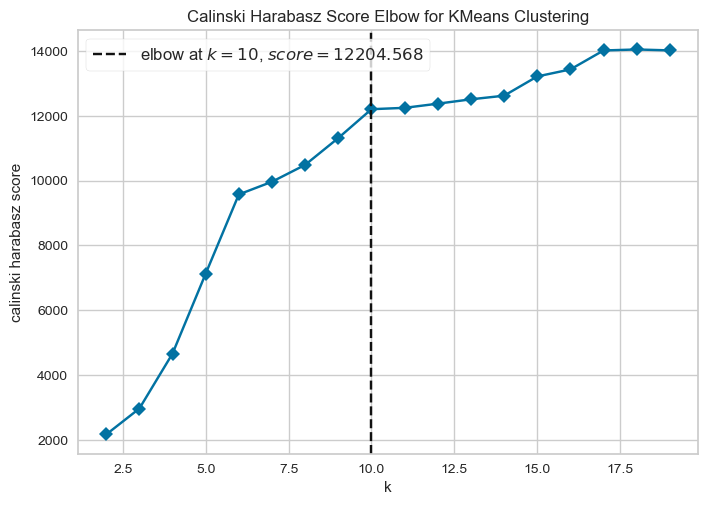

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
#Create a Kmeans model and plot the number of Ks between 2 and 20 using calinski_harabasz score

model = KMeans(random_state=seed, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,20), timings=False, metric='calinski_harabasz', locate_elbow=True)
visualizer.fit(X)
visualizer.show()

The K values for these two different scores are different. 

To learn more about what k value might be best visually, plot a silhouette plot. 

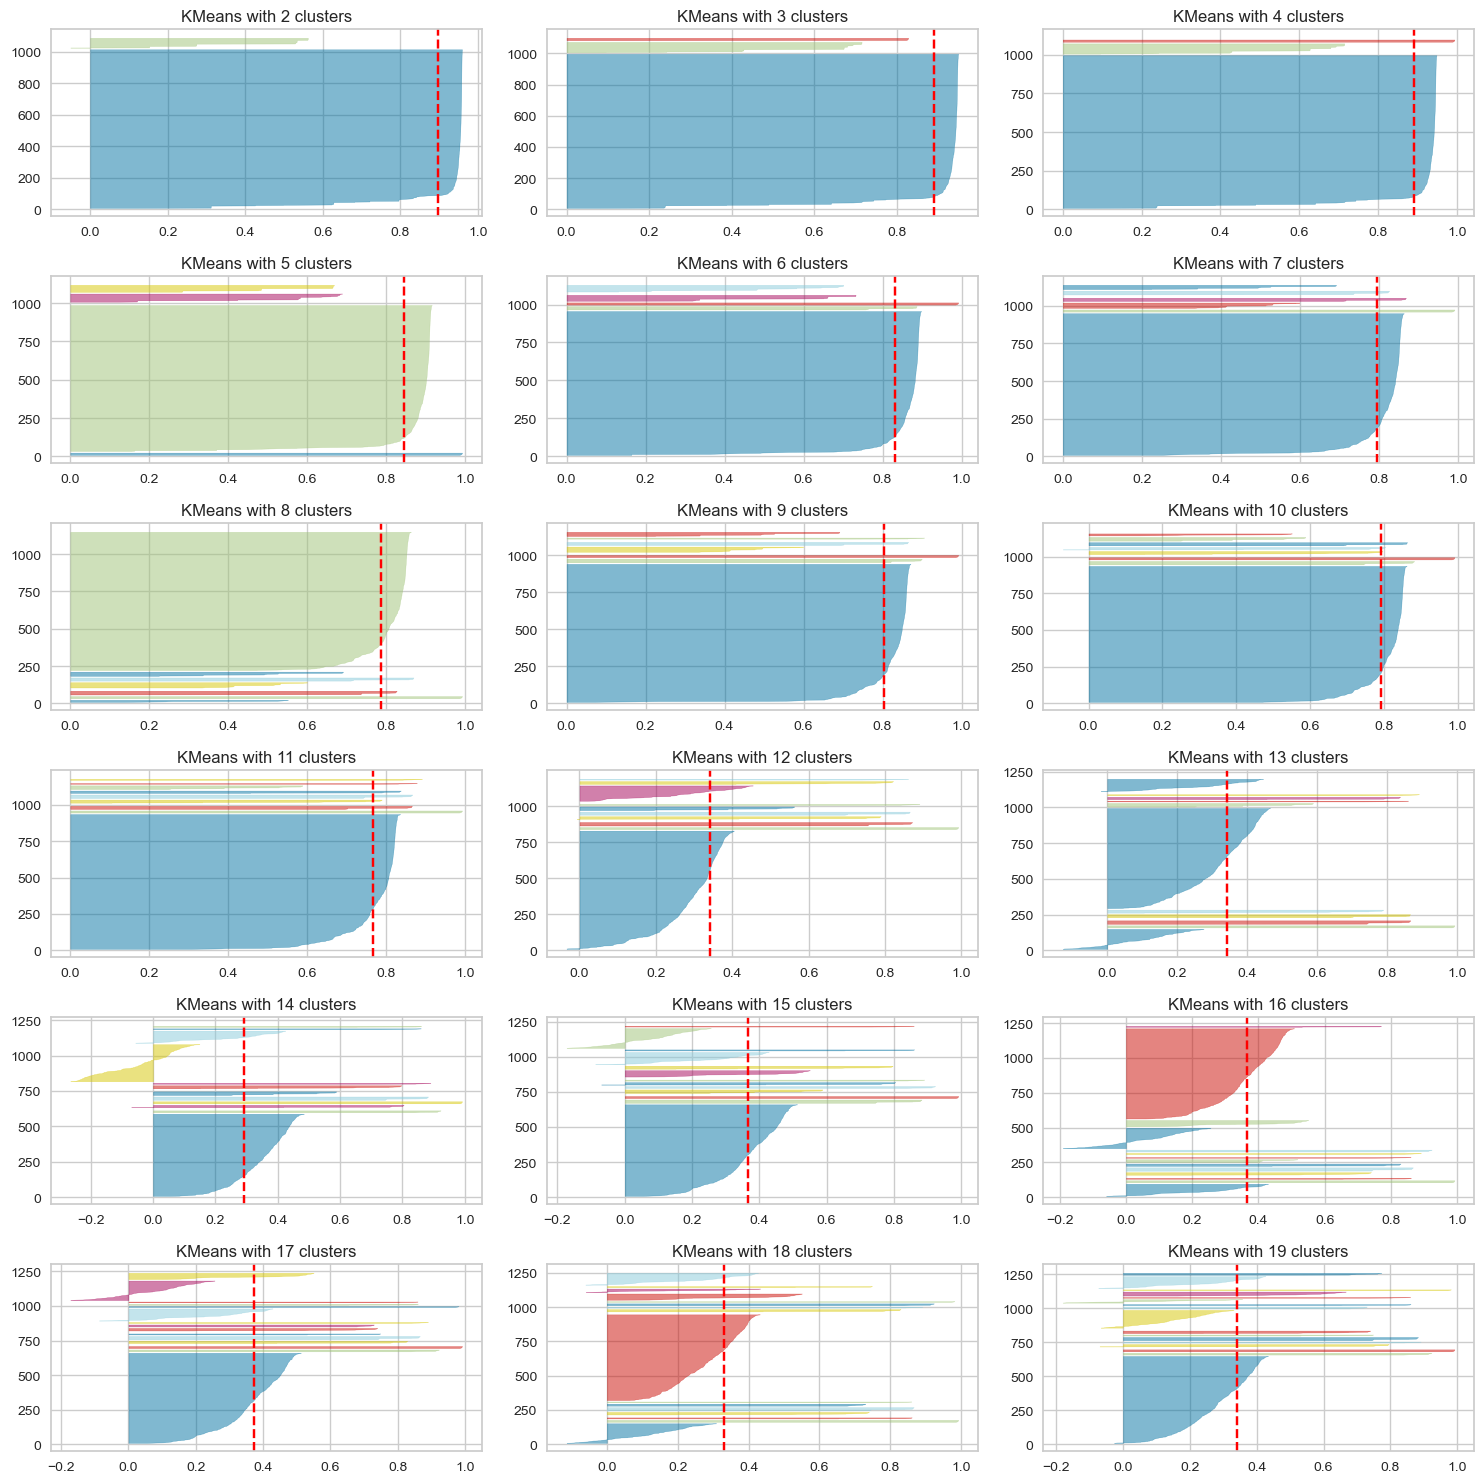

In [12]:
# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

Run a Kmeans with 5 clusters to get "final" results. 

In [13]:
# K Means Model with 3 Clusters
kmeans_final = KMeans(random_state=seed, n_clusters=5, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.846


In [14]:
# Save the cluster assignments as a new columns in the dataset
X_ac = X_withCountry.copy()
X_ac["kmeans_labels"] = y_pred_test_kmeans_final
X_ac.head()

Country Name Country Code  Year  \
0      Albania          ALB  -1.0   
1      Albania          ALB  -0.7   
2      Albania          ALB   0.1   
3      Albania          ALB   0.5   
4      Albania          ALB   0.6   

   A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                1.0              
1                                                1.0              
2                                                1.0              
3                                                1.0              
4                                                1.0              

   A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                1.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0                                 

   A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can register a business in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can sign a contract in the same way as a man (1=yes; 0=no)  ...  \
0                                                0.0                   ...   
1                                                0.0                   ...   
2                                                1.0                   ...   
3                                                1.0                   ...   
4                                                1.0                   ...   

   The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)  \
0                                                1.0                                    
1                                                1.0                                    
2                                                1.0                                    
3                                                1.0                                    
4                                                1.0                             

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

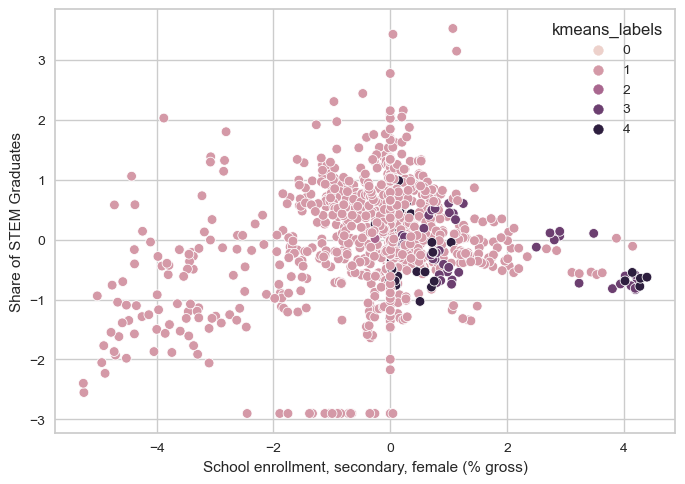

In [15]:
# Plot secondary school enrollment vs. STEM graduates and show cluster assignments
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_labels')

<Axes: xlabel='kmeans_labels', ylabel='Share of STEM Graduates'>

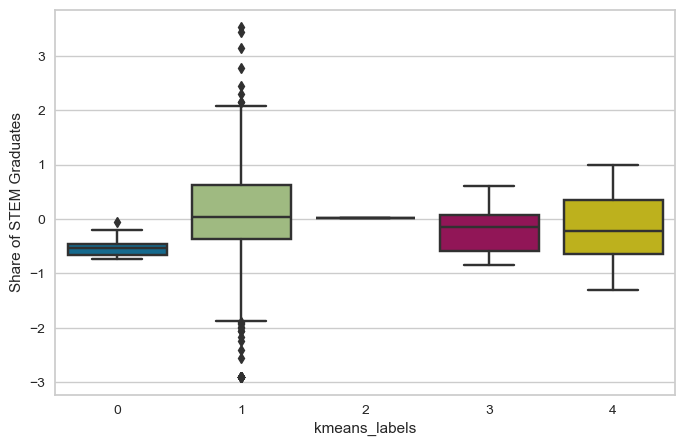

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_labels', y='Share of STEM Graduates', data=X_ac)

### Feature Engineering: PCA Feature Selection

In [17]:
# Step 1: Initialize a model object
pca = PCA(random_state=seed)

# Step 2: Train the model
pca_data = pca.fit(X)

# Step 3: Get explained_variance_ratio_
pca_data.explained_variance_ratio_

array([9.10987184e-01, 7.82241619e-02, 4.34362129e-03, 1.07356216e-03,
       1.06533142e-03, 9.30310573e-04, 5.42891011e-04, 4.92191891e-04,
       4.30636168e-04, 3.59886783e-04, 2.85609906e-04, 2.45395418e-04,
       1.36490351e-04, 1.01273232e-04, 9.87478889e-05, 7.73134412e-05,
       6.45356439e-05, 5.60871561e-05, 4.64226242e-05, 4.03059619e-05,
       3.52924063e-05, 3.06690823e-05, 2.76889041e-05, 2.70768009e-05,
       2.46400174e-05, 2.23601014e-05, 2.05782978e-05, 1.90453046e-05,
       1.78039638e-05, 1.75118070e-05, 1.65460707e-05, 1.57927242e-05,
       1.24626720e-05, 1.17201400e-05, 1.16640386e-05, 1.08547272e-05,
       1.03346843e-05, 9.05635461e-06, 7.56250404e-06, 7.21618120e-06,
       6.60588035e-06, 6.07857599e-06, 5.40236218e-06, 5.17945598e-06,
       4.46469248e-06, 4.06887265e-06, 3.14483514e-06, 2.31959582e-06,
       1.92101733e-06, 1.26744378e-06, 1.11902329e-06, 4.31157312e-07,
       1.61828201e-07])

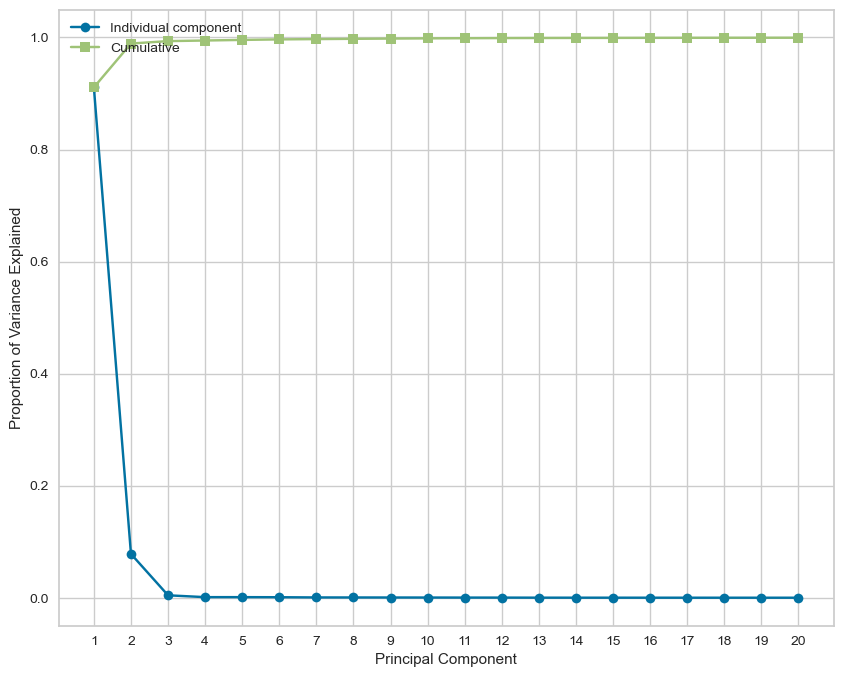

In [18]:
# Plot the variance explained ratios from the PCA to see how many components are needed to explain all of the features. 

pcidx = np.arange(1, 21)

plt.figure(figsize=(10, 8))

plt.plot(pcidx, pca_data.explained_variance_ratio_[:20], '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca_data.explained_variance_ratio_[:20]), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(pcidx)
plt.legend(loc=2)

In [19]:
# The plot appears to flatten after 4 components. Create a new dataframe that is a PCA subset with n_components=4

n_components = 4
pca = PCA(n_components=n_components, random_state=seed)
X_PCA = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3','PC4'], index=X.index)
X_PCA

PC1       PC2       PC3       PC4
0    -22.629607  1.096542 -2.215952  0.403762
1    -22.621883  1.088176 -2.140666 -0.263758
2    -22.617469  1.086330 -2.071417 -0.552819
3    -22.615105  1.083676 -2.049985 -0.770621
4    -22.613232  1.081918 -2.042882 -0.897009
...         ...       ...       ...       ...
1066 -22.632781  1.117828 -2.105228  0.479529
1067 -22.639598  1.125254 -2.023328  2.763874
1068 -22.640315  1.125733 -2.016950  2.792242
1069 -22.648515  1.134262 -2.007201  3.174843
1070 -22.634520  1.118941 -1.943115  2.273635

[1071 rows x 4 columns]

### Model 1: With PCA Feature Selection

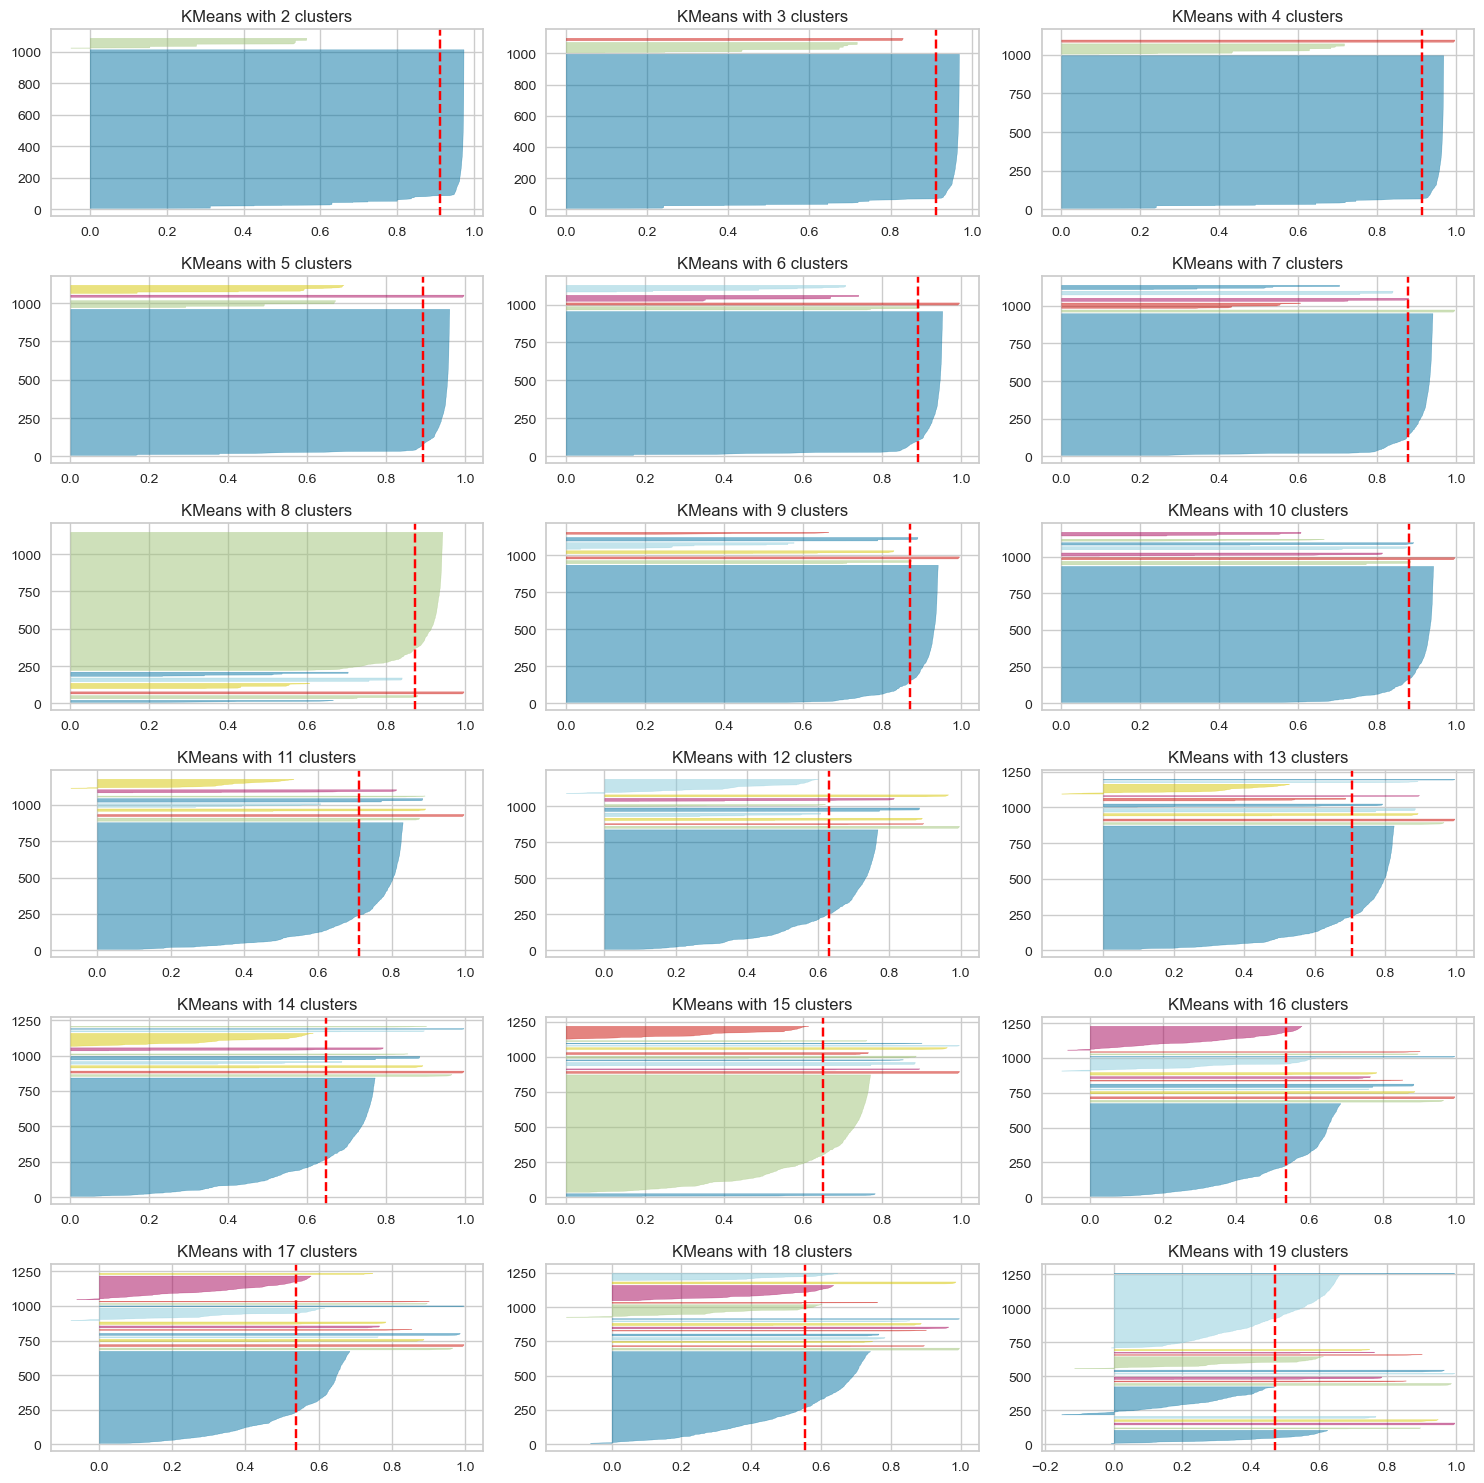

In [20]:
# Plot the silhouette plot again to see the optimal number of clusters with the PCA data

# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X_PCA)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Train the model using 4 clusters

# Step 1: Initialize a model object
kmeans_final = KMeans(random_state=seed, n_clusters=4, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_final = kmeans_final.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_final = kmeans_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X_PCA, y_pred_test_kmeans_final)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.914


In [22]:
# Save the cluster assignments as a new columns in the dataset
X_ac["kmeans_pca_labels"] = y_pred_test_kmeans_final
X_ac

Country Name Country Code  Year  \
0                Albania          ALB  -1.0   
1                Albania          ALB  -0.7   
2                Albania          ALB   0.1   
3                Albania          ALB   0.5   
4                Albania          ALB   0.6   
...                  ...          ...   ...   
1066  West Bank and Gaza          PSE   0.8   
1067            Zimbabwe          ZWE   0.0   
1068            Zimbabwe          ZWE   0.1   
1069            Zimbabwe          ZWE   0.2   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                1.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                0.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1066                                                0.0              
1067                                                1.0              
1068                                                1.0              
1069                                                1.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1066                                 

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

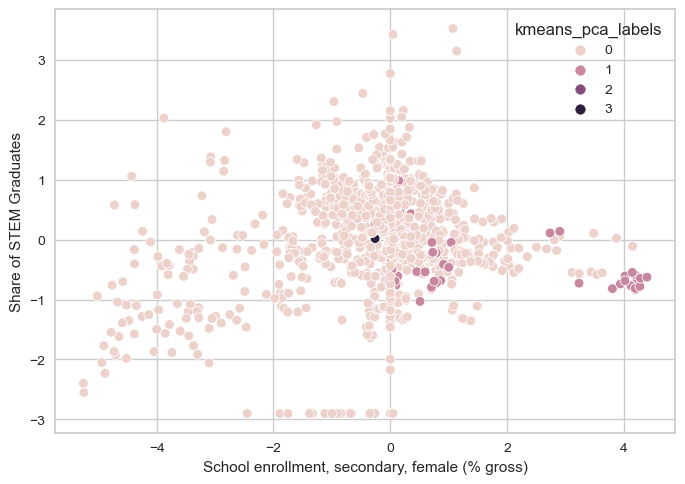

In [23]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='kmeans_pca_labels')


<Axes: xlabel='kmeans_pca_labels', ylabel='Share of STEM Graduates'>

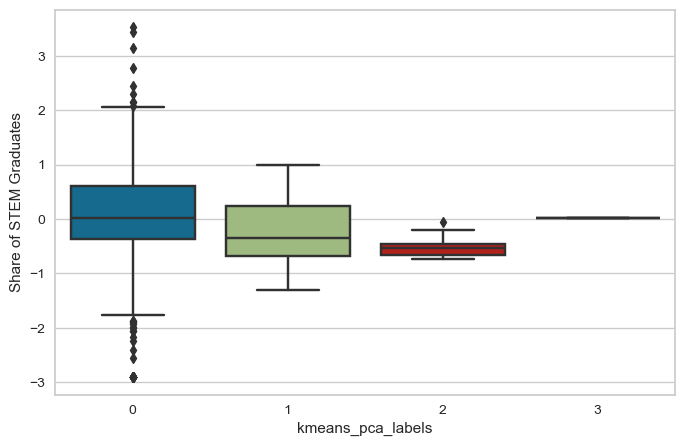

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_pca_labels', y='Share of STEM Graduates', data=X_ac)

There is still a fair amount of overlap in the clusters and interpreting the results to gather insights may be challenging. 

### Model 2: Agglomerative Clustering

Train an initial model using the original dataset (X)

In [25]:
# Step 1: Initialize a model object
agg_clustering = AgglomerativeClustering()

# Step 2: Train the model
agg_clustering.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_agg_clustering = agg_clustering.labels_

# Step 4: Evaluate the model performance
silhouette_score_train_agg = silhouette_score(X, y_pred_train_agg_clustering)

print('Silhouette score:', round(silhouette_score_train_agg, 3))
print('Number of Clusters (default model):', round(agg_clustering.n_clusters_, 3))

Silhouette score: 0.897
Number of Clusters (default model): 2


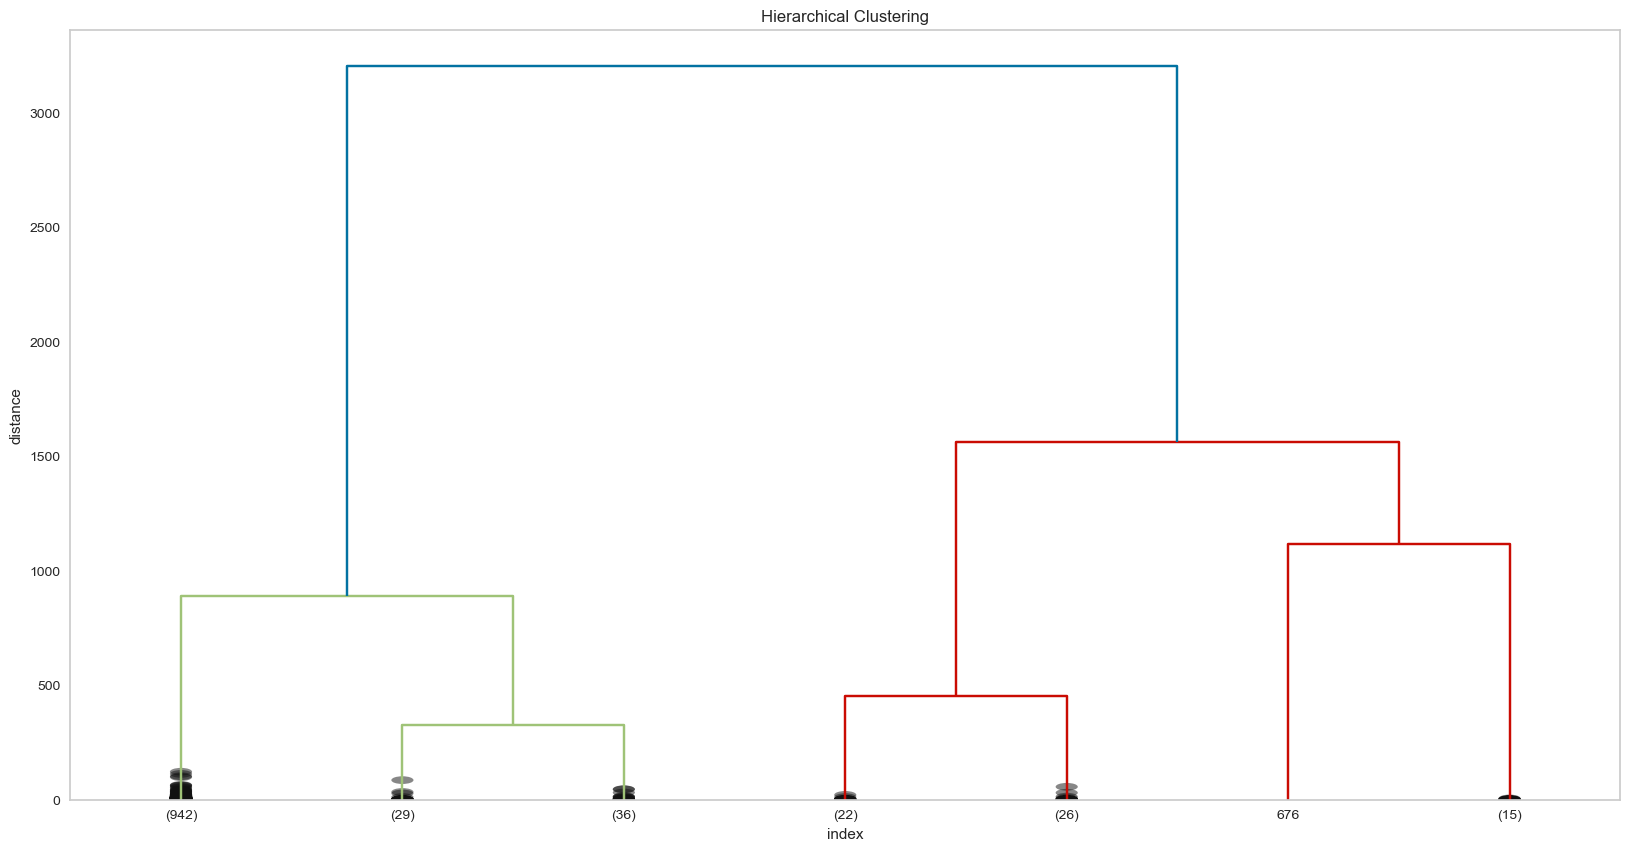

In [26]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

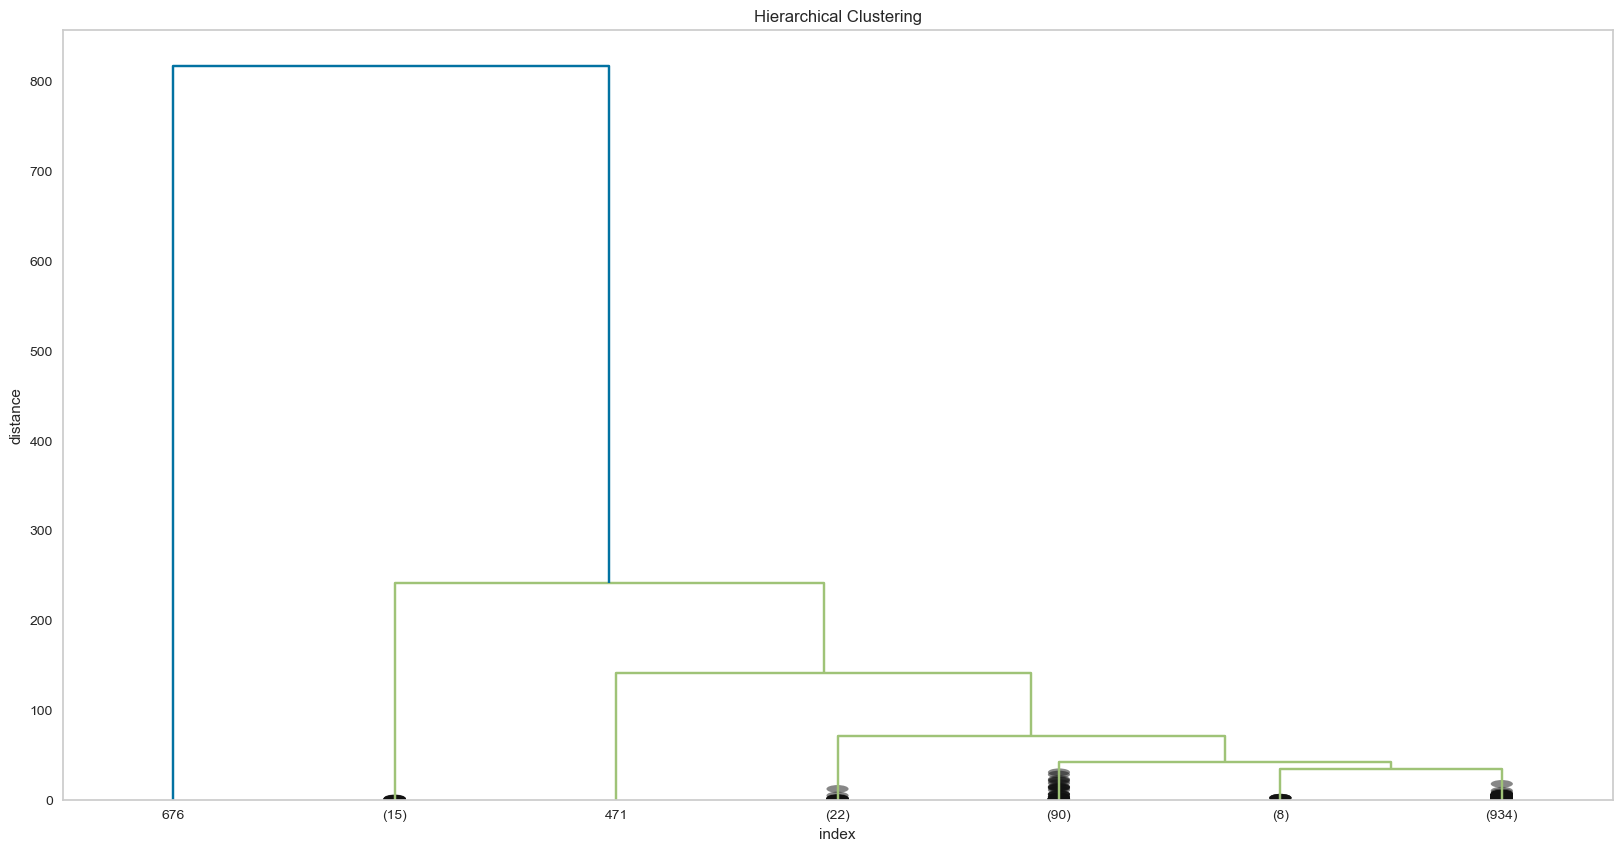

In [27]:
#single linkage
Z = linkage(X,method='single',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

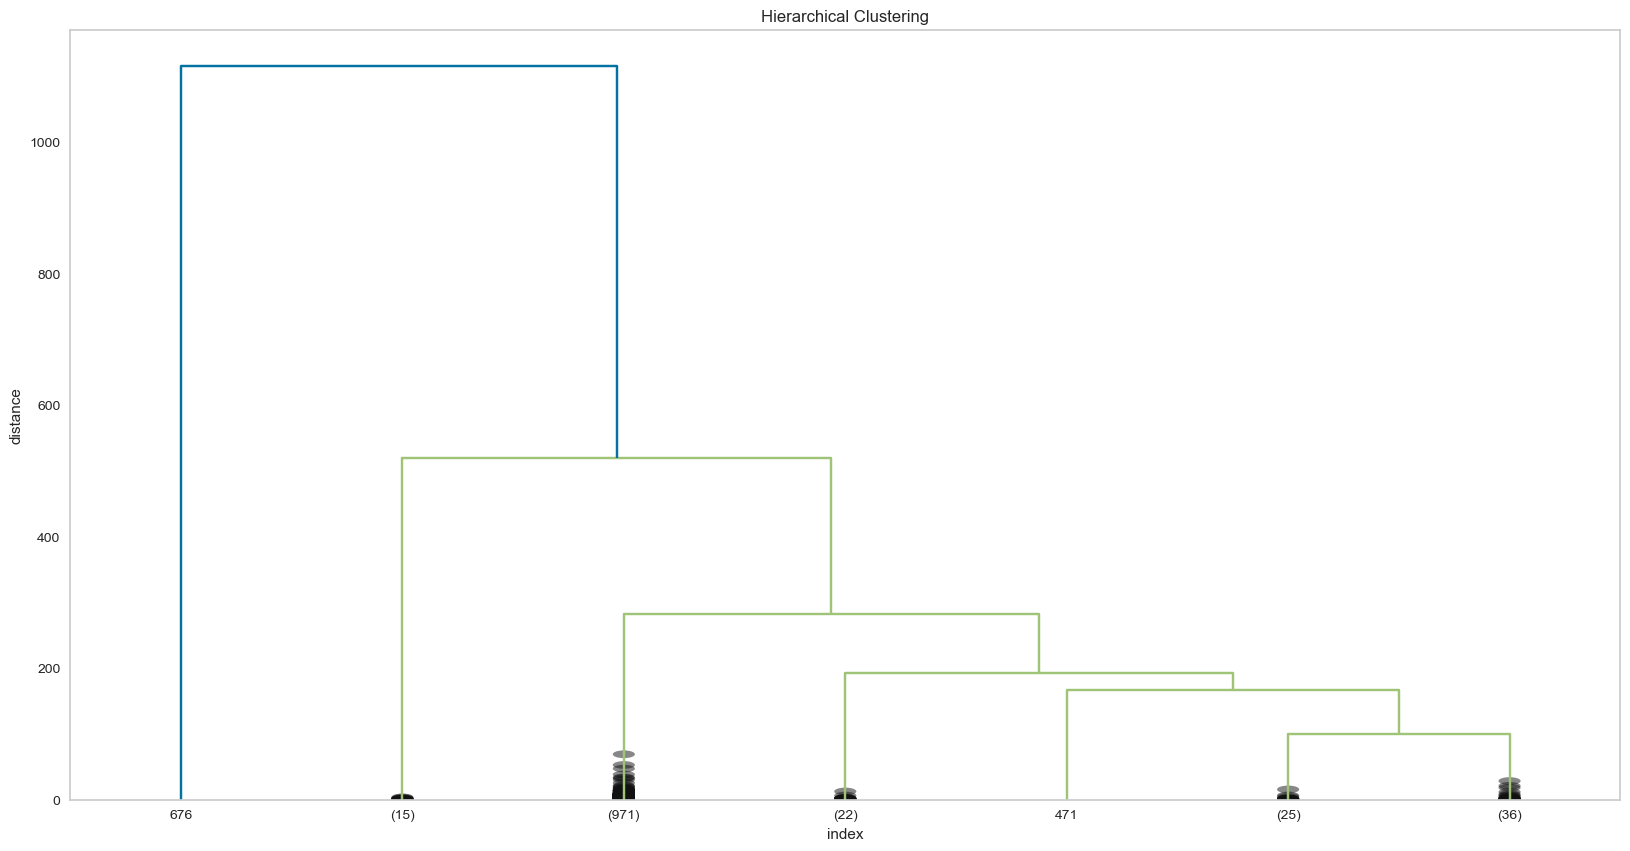

In [28]:
#complete linkage
Z = linkage(X,method='complete',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

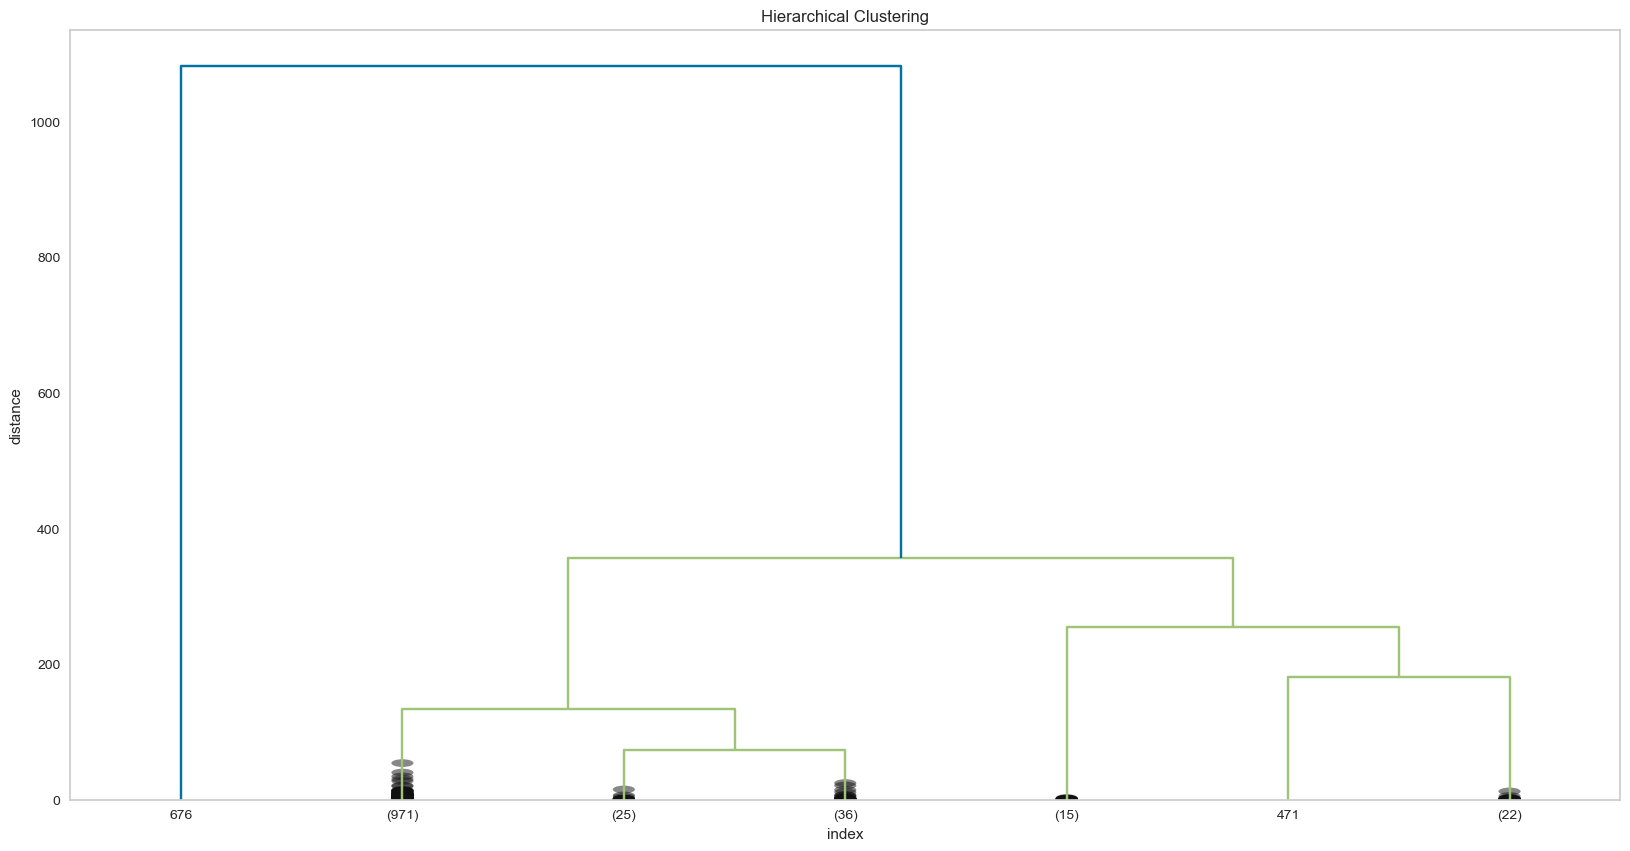

In [29]:
#avg linkage
Z = linkage(X,method='average',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

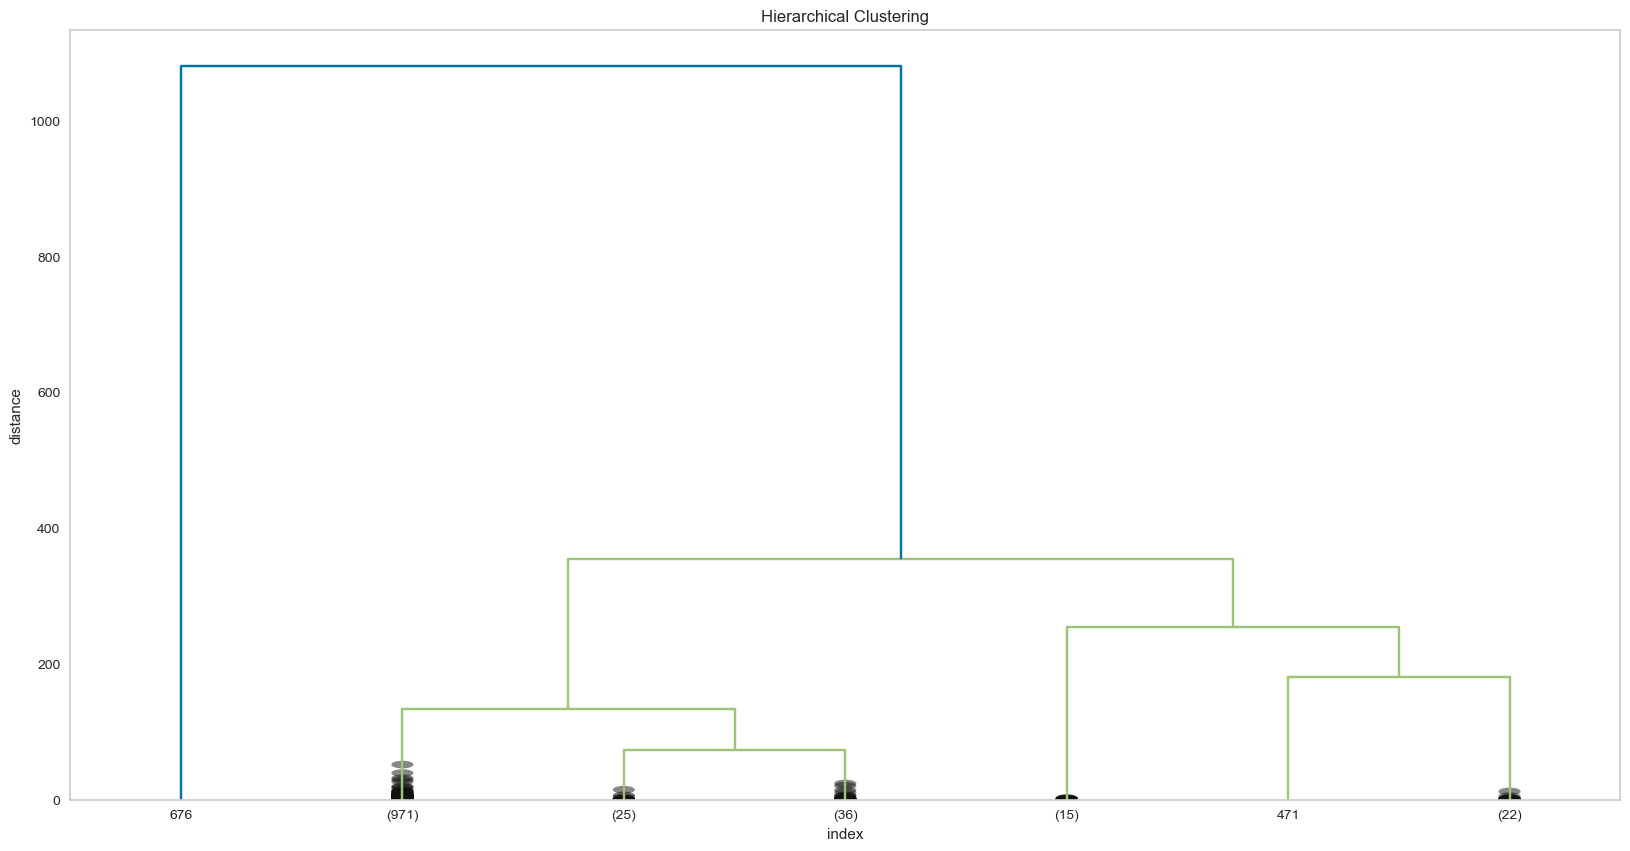

In [30]:
#centroid linkage
Z = linkage(X,method='centroid',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

Re-run the agglomerative clustering with 3 clusters. 

In [31]:
# Step 1: Initialize a model object
agg_clustering_final = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_final.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_final = agg_clustering_final.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_final = silhouette_score(X, y_pred_test_agg_clustering_final, random_state=17)

print('Silhouette score:', round(silhouette_score_test_agg_clustering_final))

Silhouette score: 1


In [32]:
# Save cluster labels into results dataframe
X_ac["hc_labels"] = y_pred_test_agg_clustering_final
X_ac.head()

Country Name Country Code  Year  \
0      Albania          ALB  -1.0   
1      Albania          ALB  -0.7   
2      Albania          ALB   0.1   
3      Albania          ALB   0.5   
4      Albania          ALB   0.6   

   A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                1.0                         
1                                                1.0                         
2                                                1.0                         
3                                                1.0                         
4                                                1.0                         

   A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                1.0              
1                                                1.0              
2                                                1.0              
3                                                1.0              
4                                                1.0              

   A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                1.0                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0                                 

   A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can register a business in the same way as a man (1=yes; 0=no)  \
0                                                1.0                        
1                                                1.0                        
2                                                1.0                        
3                                                1.0                        
4                                                1.0                        

   A woman can sign a contract in the same way as a man (1=yes; 0=no)  ...  \
0                                                0.0                   ...   
1                                                0.0                   ...   
2                                                1.0                   ...   
3                                                1.0                   ...   
4                                                1.0                   ...   

   The law provides for the valuation of nonmonetary contributions (1=yes; 0=no)  \
0                                                1.0                               
1                                                1.0                               
2                                                1.0                               
3                                                1.0                               
4                                                1.0                               

   The mandatory reti

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

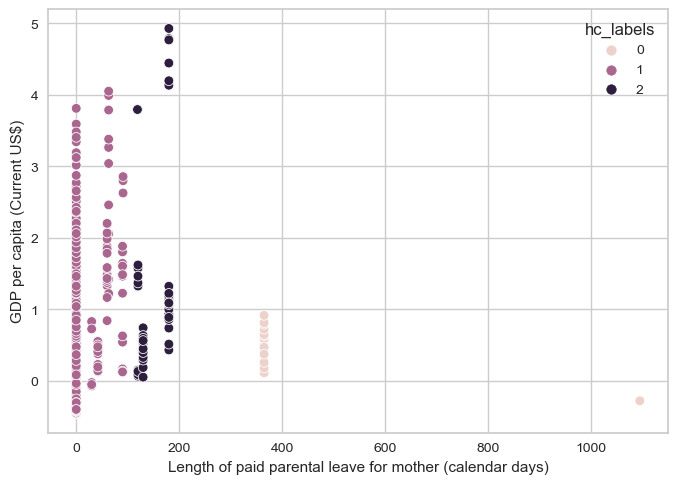

In [33]:
# Plot a few variables to see if the clustering seems to draw insight. 
sns.scatterplot(data=X_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='hc_labels')


<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

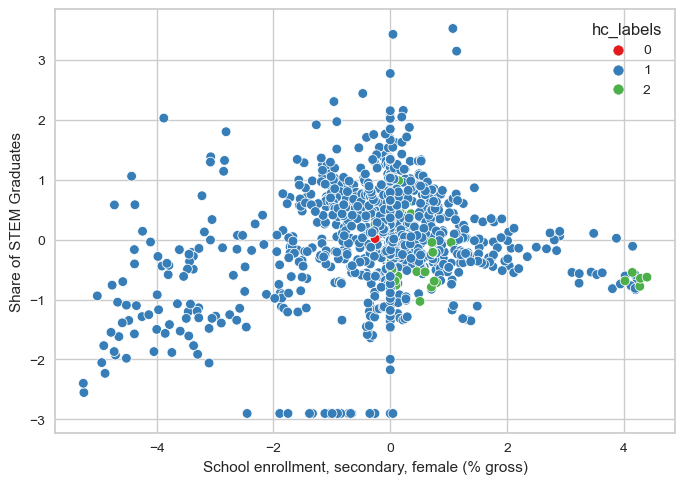

In [34]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='hc_labels',palette='Set1')

<Axes: xlabel='hc_labels', ylabel='Share of STEM Graduates'>

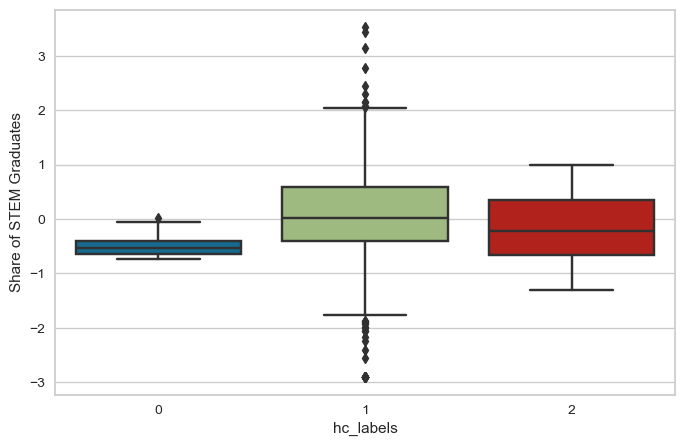

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_labels', y='Share of STEM Graduates', data=X_ac)

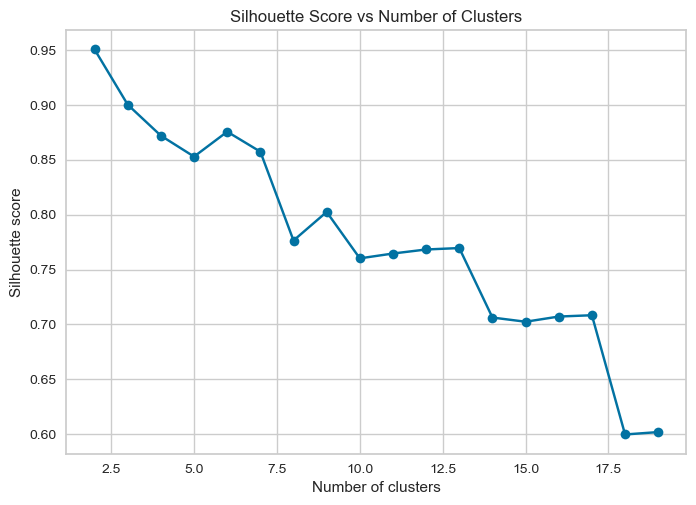

In [36]:
silhouette_scores = []
for n_clusters in range(2, 20):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='average')
    cluster_labels = agg_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=seed)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


### Model 2: With PCA Feature Selection

In [37]:
# Step 1: Initialize a model object
agg_clustering_PCA = AgglomerativeClustering(n_clusters=3, linkage='ward',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_PCA.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_PCA = agg_clustering_PCA.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_final = silhouette_score(X_PCA, y_pred_test_agg_clustering_PCA, random_state=17)

# Save cluster labels into results dataframe
X_ac["hc_labels_PCA"] = y_pred_test_agg_clustering_PCA

print('Silhouette score:', round(silhouette_score_test_agg_clustering_final))

Silhouette score: 1


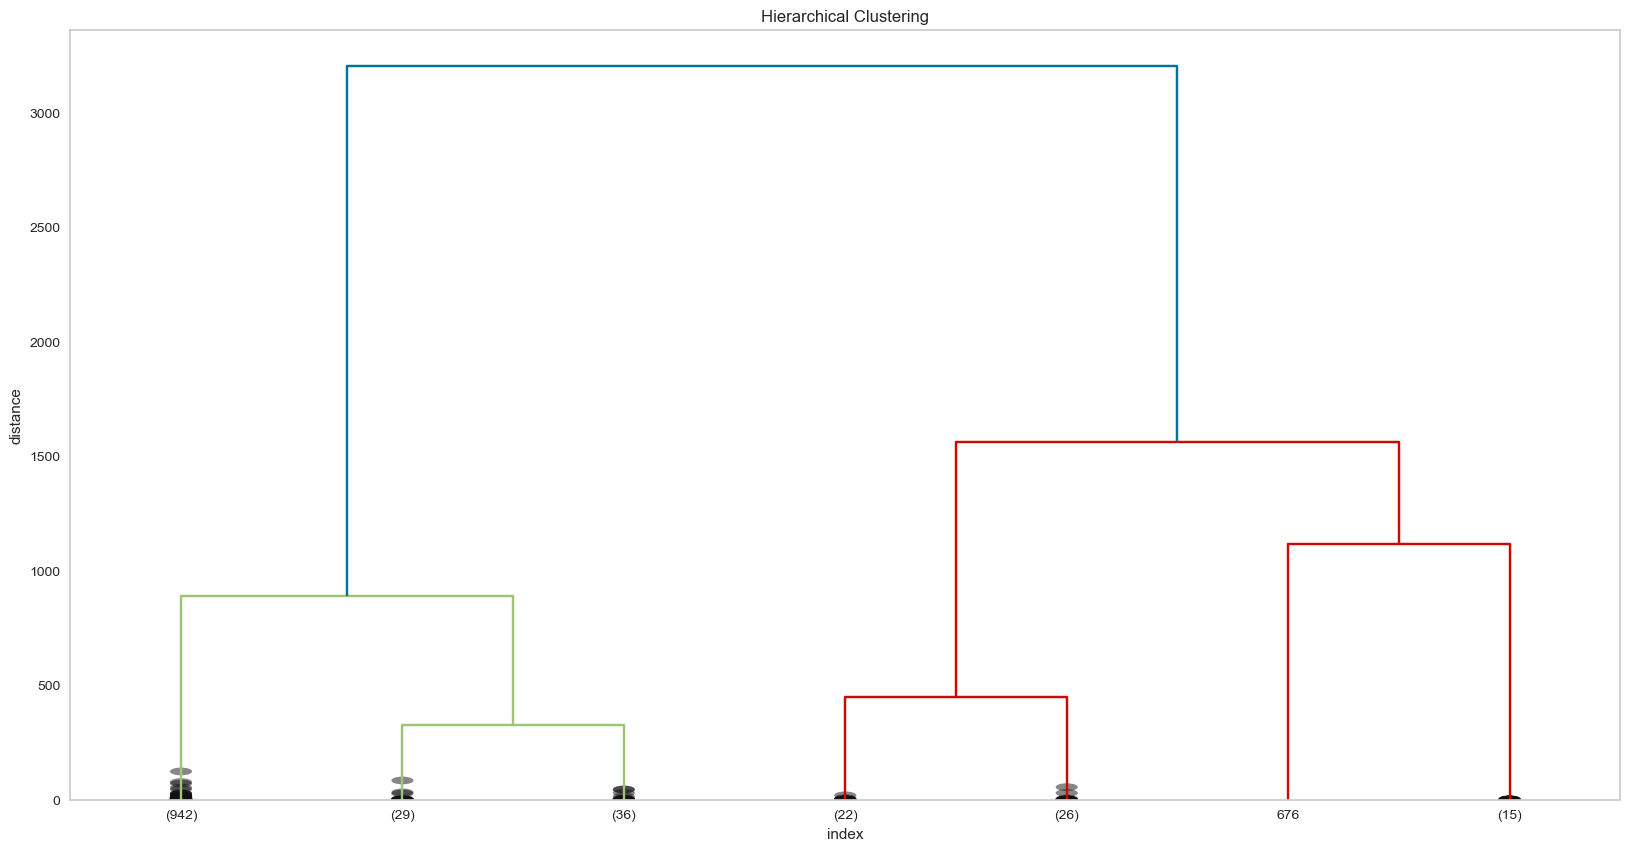

In [38]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_PCA,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

<Axes: xlabel='hc_labels_PCA', ylabel='Share of STEM Graduates'>

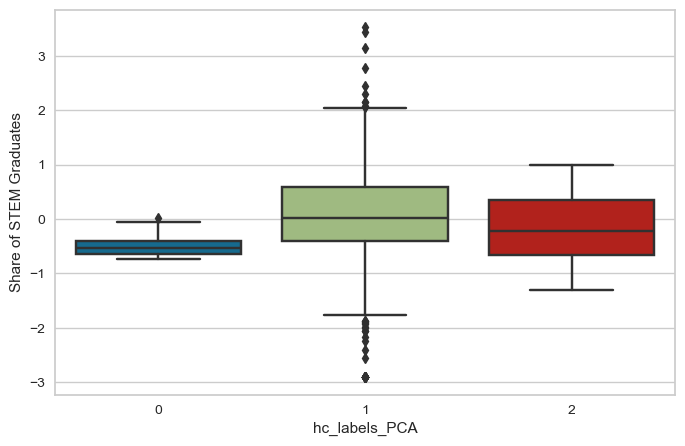

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_labels_PCA', y='Share of STEM Graduates', data=X_ac)

### Model 3: DBSCAN

In [40]:
# Step 1: Initialize a model object
dbscan = DBSCAN(eps=40, min_samples=3)

# Step 2: Train the model
dbscan.fit(X)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF

X_ac["dbscan_labels"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.846


In [41]:
# Tune parameters & fit to X_PCA data. 

# Step 1: Initialize a model object
dbscan_PCA = DBSCAN(eps=40, min_samples=3)

# Step 2: Train the model
dbscan_PCA.fit(X_PCA)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan_PCA = dbscan_PCA.labels_

# Save to results DF
X_ac["dbscan_pca_labels"] = y_pred_train_dbscan_PCA

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan_PCA = silhouette_score(X_PCA, y_pred_train_dbscan_PCA)

print('Silhouette score:', round(silhouette_score_train_dbscan_PCA, 3))

Silhouette score: 0.887


In [42]:
# How many data points were assigned to each cluster? 
X_ac['dbscan_pca_labels'].value_counts()

dbscan_pca_labels
 0    942
 1     90
 2     22
 3     15
-1      2
Name: count, dtype: int64

<Axes: xlabel='dbscan_labels', ylabel='School enrollment, secondary, female (% gross)'>

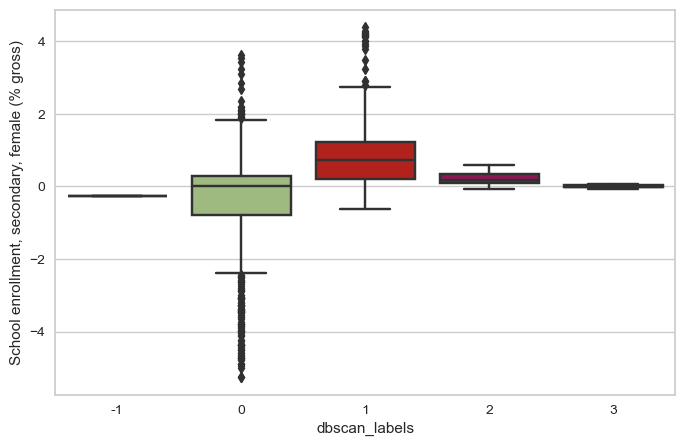

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels', y='School enrollment, secondary, female (% gross)', data=X_ac)

<Axes: xlabel='dbscan_pca_labels', ylabel='School enrollment, secondary, female (% gross)'>

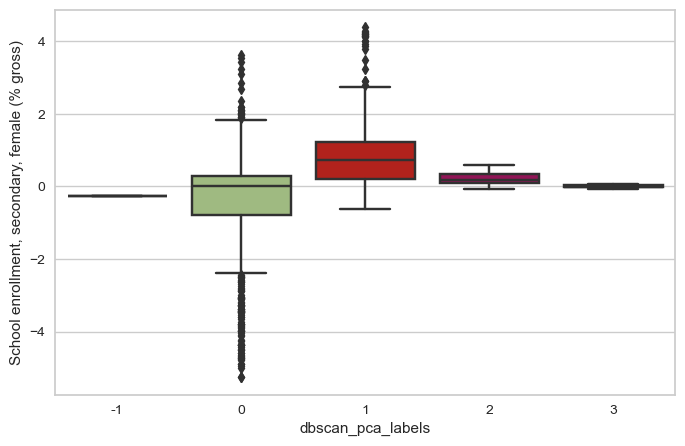

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels', y='School enrollment, secondary, female (% gross)', data=X_ac)

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

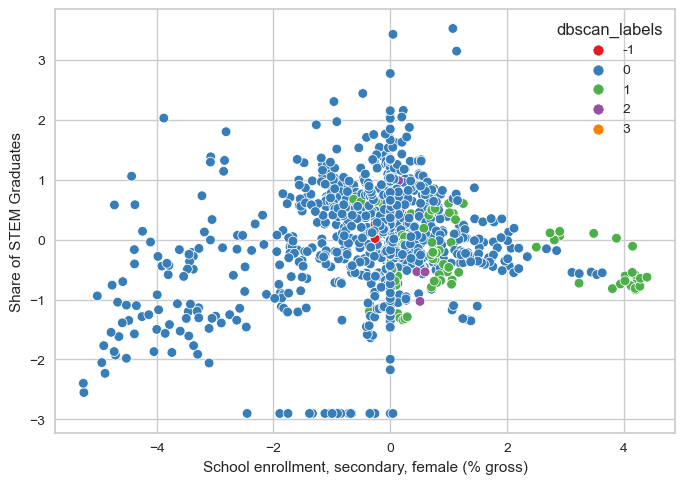

In [45]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_labels',palette='Set1')

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

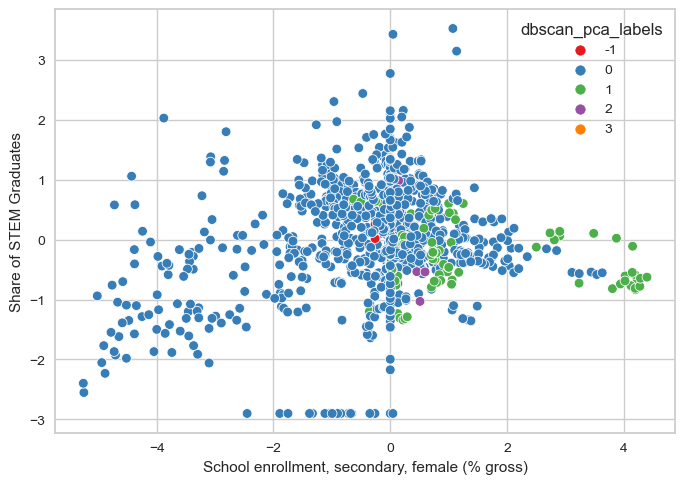

In [46]:
sns.scatterplot(data=X_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_pca_labels',palette='Set1')

The assignment for cluster=0 is still dominant for most of the data and making it difficult to get insights from the results. 

### Feature Engineering Part 2. Limit the dataset to only one year.

The volume of overlapping data points is making clusters difficult to interpret. Consider a single year's worth of data to see if clusters are more defined. 

In [47]:
X

Year  \
0     -1.0   
1     -0.7   
2      0.1   
3      0.5   
4      0.6   
...    ...   
1066   0.8   
1067   0.0   
1068   0.1   
1069   0.2   
1070   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                1.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                         
1                                                   1.0                         
2                                                   1.0                         
3                                                   1.0                         
4                                                   1.0                         
...                                                 ...                         
1066                                                0.0                         
1067                                                1.0                         
1068                                                1.0                         
1069                                                1.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
0                                                   1.0              
1                                                   1.0              
2                                                   1.0              
3                                                   1.0              
4                                                   1.0              
...                                                 ...              
1066                                                0.0              
1067                                                1.0              
1068                                                1.0              
1069                                                1.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
0                                                   1.0                                 
1                                                   1.0                                 
2                                                   1.0                                 
3                                                   1.0                                 
4                                                   1.0                                 
...                                                 ...                                 
1066                                                0.0                                 
1067                                                0.0                                 
1068                                                0.0                                 
1069                                                0.0                                 
1070                                                0.0                

In [48]:
# 2015 = 0.5
X_noYear = X[X['Year']==0.5]
X_noYear = X_noYear.drop(columns='Year')

In [49]:
X_noYear_withCountry = X_withCountry[X_withCountry['Year']==0.5]

In [50]:
X_noYear_withCountry

Country Name Country Code  Year  \
3                Albania          ALB   0.5   
11               Algeria          DZA   0.5   
15                Angola          AGO   0.5   
26               Armenia          ARM   0.5   
41             Australia          AUS   0.5   
...                  ...          ...   ...   
1028      United Kingdom          GBR   0.5   
1036       United States          USA   0.5   
1051            Viet Nam          VNM   0.5   
1063  West Bank and Gaza          PSE   0.5   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                0.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
3                                                   1.0              
11                                                  1.0              
15                                                  1.0              
26                                                  1.0              
41                                                  1.0              
...                                                 ...              
1028                                                1.0              
1036                                                1.0              
1051                                                1.0              
1063                                                0.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                                 
11                                                  0.0                                 
15                                                  1.0                                 
26                                                  1.0                                 
41                                                  1.0                                 
...                                                 ...                                 
1028                                 

In [51]:
X_noYear.shape

(88, 52)

### Model 1: KMeans With Single Year Data

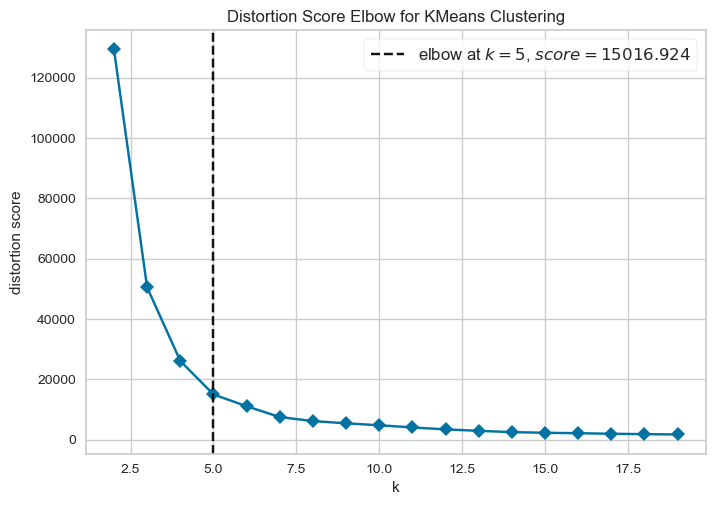

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
#Create a Kmeans model and plot the number of Ks between 2 and 12
seed = 17

model = KMeans(random_state=seed, n_init=10)

visualizer = KElbowVisualizer(model, k=(2,20), timings=False)
visualizer.fit(X_noYear)
visualizer.show()

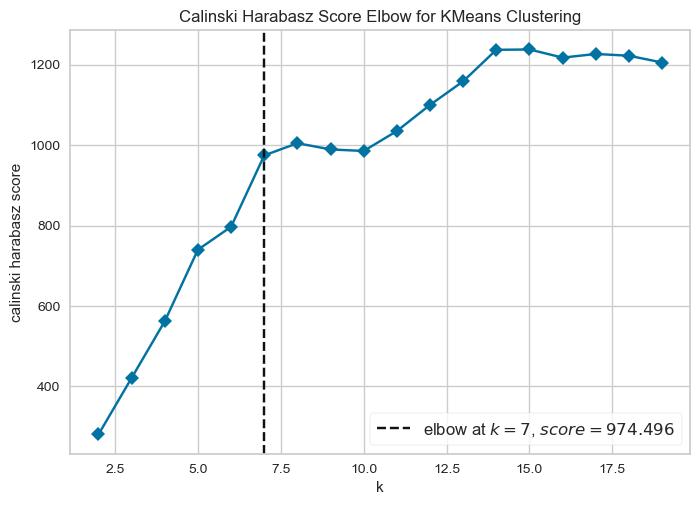

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [53]:
#Create a Kmeans model and plot the number of Ks between 2 and 12 using calinski_harabasz score

model = KMeans(random_state=seed, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,20), timings=False, metric='calinski_harabasz', locate_elbow=True)
visualizer.fit(X_noYear)
visualizer.show()

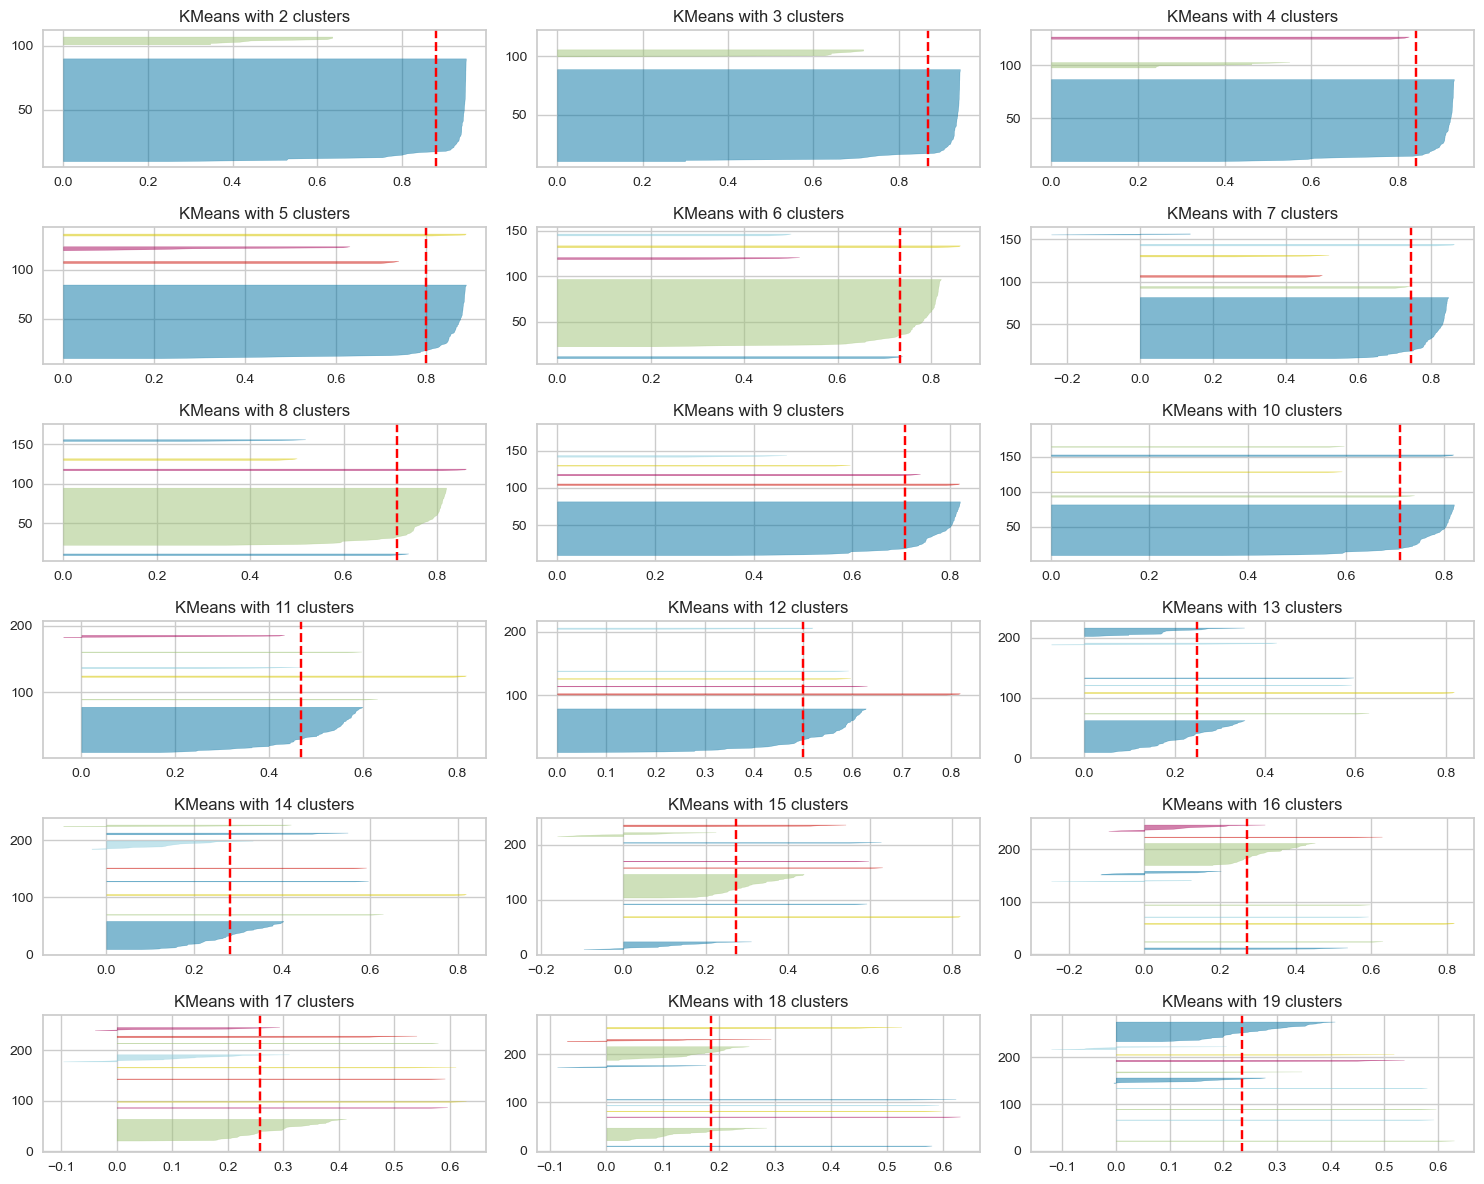

In [54]:
# Create a subplot grid
fig, ax = plt.subplots(6, 3, figsize=(15, 12))
j = 0
h = 0

for i in range(2, 20):

    # Initialize the KMeans model
    model = KMeans(random_state=seed, n_clusters=i, n_init = 10)

    # Create a SilhouetteVisualizer for the current model
    viz = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[h][j])

    # Fit the visualizer
    viz.fit(X_noYear)

    # Set the title for each subplot
    ax[h][j].set_title(f'KMeans with {i} clusters')

    # Update the subplot position
    if j < 2:
        j += 1
    else:
        j = 0
        h += 1

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
# K Means Model with 3 Clusters
kmeans_noYear = KMeans(random_state=seed, n_clusters=4, n_init = 10)

# Step 2: Train the model using the X_test
kmeans_noYear.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_test_kmeans_noYear = kmeans_noYear.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_kmeans_final = silhouette_score(X_noYear, y_pred_test_kmeans_noYear)

print('Silhouette score:', round(silhouette_score_test_kmeans_final, 3))

Silhouette score: 0.842


In [56]:
X_noYear_ac = X_noYear_withCountry.copy()
X_noYear_ac["kmeans_noYear_labels"] = y_pred_test_kmeans_noYear
X_noYear_ac.head()

Country Name Country Code  Year  \
3       Albania          ALB   0.5   
11      Algeria          DZA   0.5   
15       Angola          AGO   0.5   
26      Armenia          ARM   0.5   
41    Australia          AUS   0.5   

    A woman can be head of household in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                         
11                                                1.0                         
15                                                1.0                         
26                                                1.0                         
41                                                1.0                         

    A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                         
11                                                1.0                         
15                                                1.0                         
26                                                1.0                         
41                                                1.0                         

    A woman can get a job in the same way as a man (1=yes; 0=no)  \
3                                                 1.0              
11                                                1.0              
15                                                1.0              
26                                                1.0              
41                                                1.0              

    A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                                 
11                                                0.0                                 
15                                                1.0                                 
26                                                1.0                                 
41                                                1.0                                 

    A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                        
11                                                1.0                        
15                                                1.0                        
26                                                1.0                        
41                                                1.0                        

    A woman can register a business in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                        
11                                                1.0                        
15                                                1.0                        
26                                                1.0                        
41                                                1.0                        

    A woman can sign a contract in the same way as a man (1=yes; 0=no)  ...  \
3                                                 1.0                   ...   
11                                                0.0                   ...   
15                                                1.0                   ...   
26                                                0.0                   ...   
41                                                1.0                   ...   

    The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)  \
3                                                 1.0                                    
11                                                1.0                                    
15                                                1.0                                    
26                                                1.0                                    
41                           

<Axes: xlabel='kmeans_noYear_labels', ylabel='Share of STEM Graduates'>

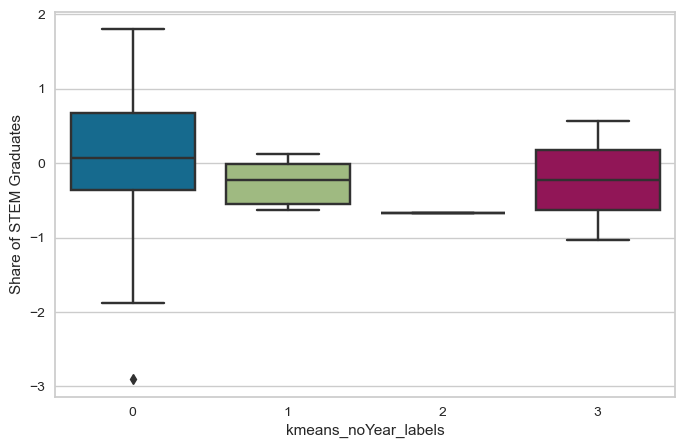

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_noYear_labels', y='Share of STEM Graduates', data=X_noYear_ac)

<Axes: xlabel='Age dependency ratio (% of working-age population)', ylabel='Share of STEM Graduates'>

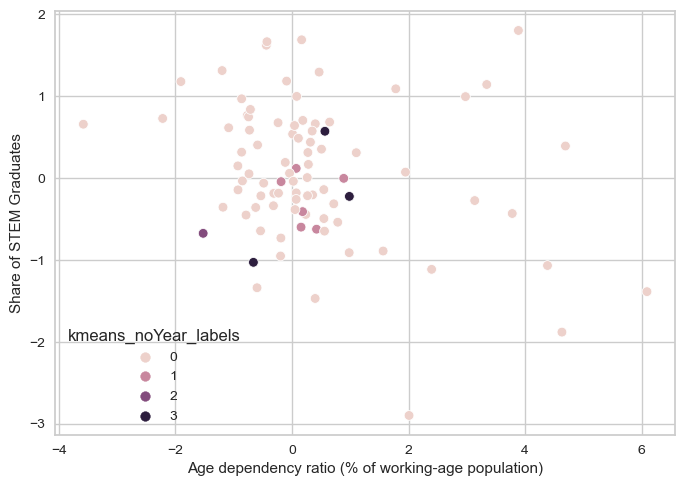

In [58]:
sns.scatterplot(data=X_noYear_ac, x='Age dependency ratio (% of working-age population)', y='Share of STEM Graduates', hue='kmeans_noYear_labels')

<Axes: xlabel='kmeans_noYear_labels', ylabel='School enrollment, secondary, female (% gross)'>

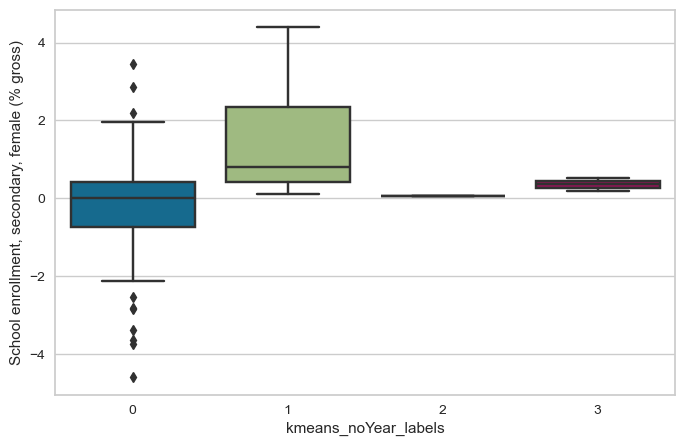

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kmeans_noYear_labels', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac)

The clusters aren't very consistent across features - hard to draw interpretations. 

### Model 2: Agglomerative Clustering Using Single Year Data

In [60]:
# Step 1: Initialize a model object
agg_clustering = AgglomerativeClustering()

# Step 2: Train the model
agg_clustering.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_agg_clustering = agg_clustering.labels_

# Step 4: Evaluate the model performance
silhouette_score_train_agg = silhouette_score(X_noYear, y_pred_train_agg_clustering)

print('Silhouette score:', round(silhouette_score_train_agg, 3))
print('Number of Clusters (default model):', round(agg_clustering.n_clusters_, 3))

Silhouette score: 0.881
Number of Clusters (default model): 2


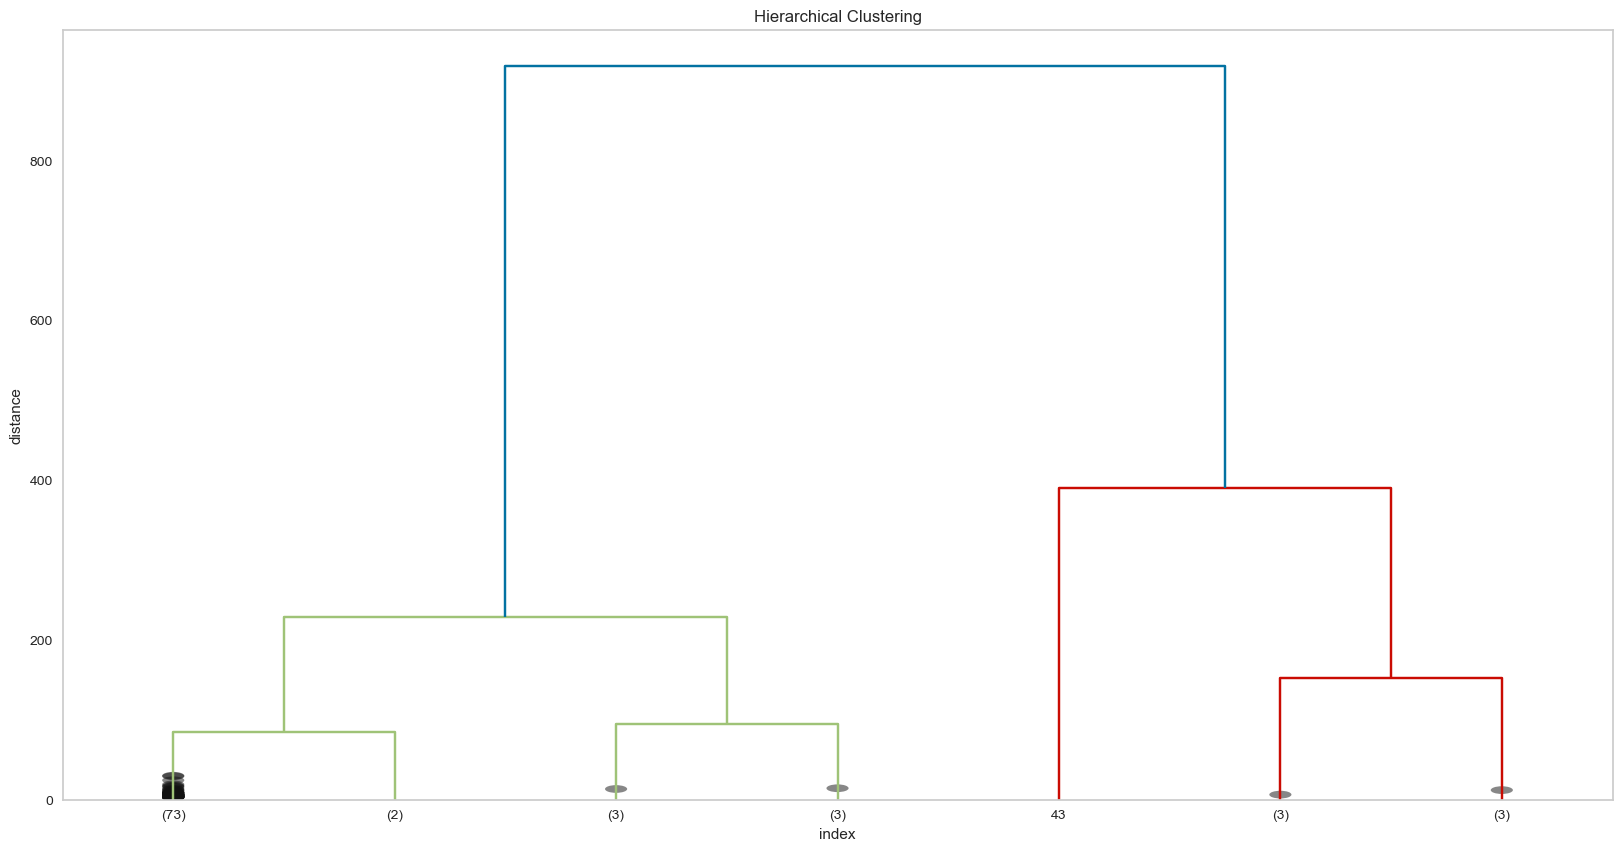

In [61]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='ward',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

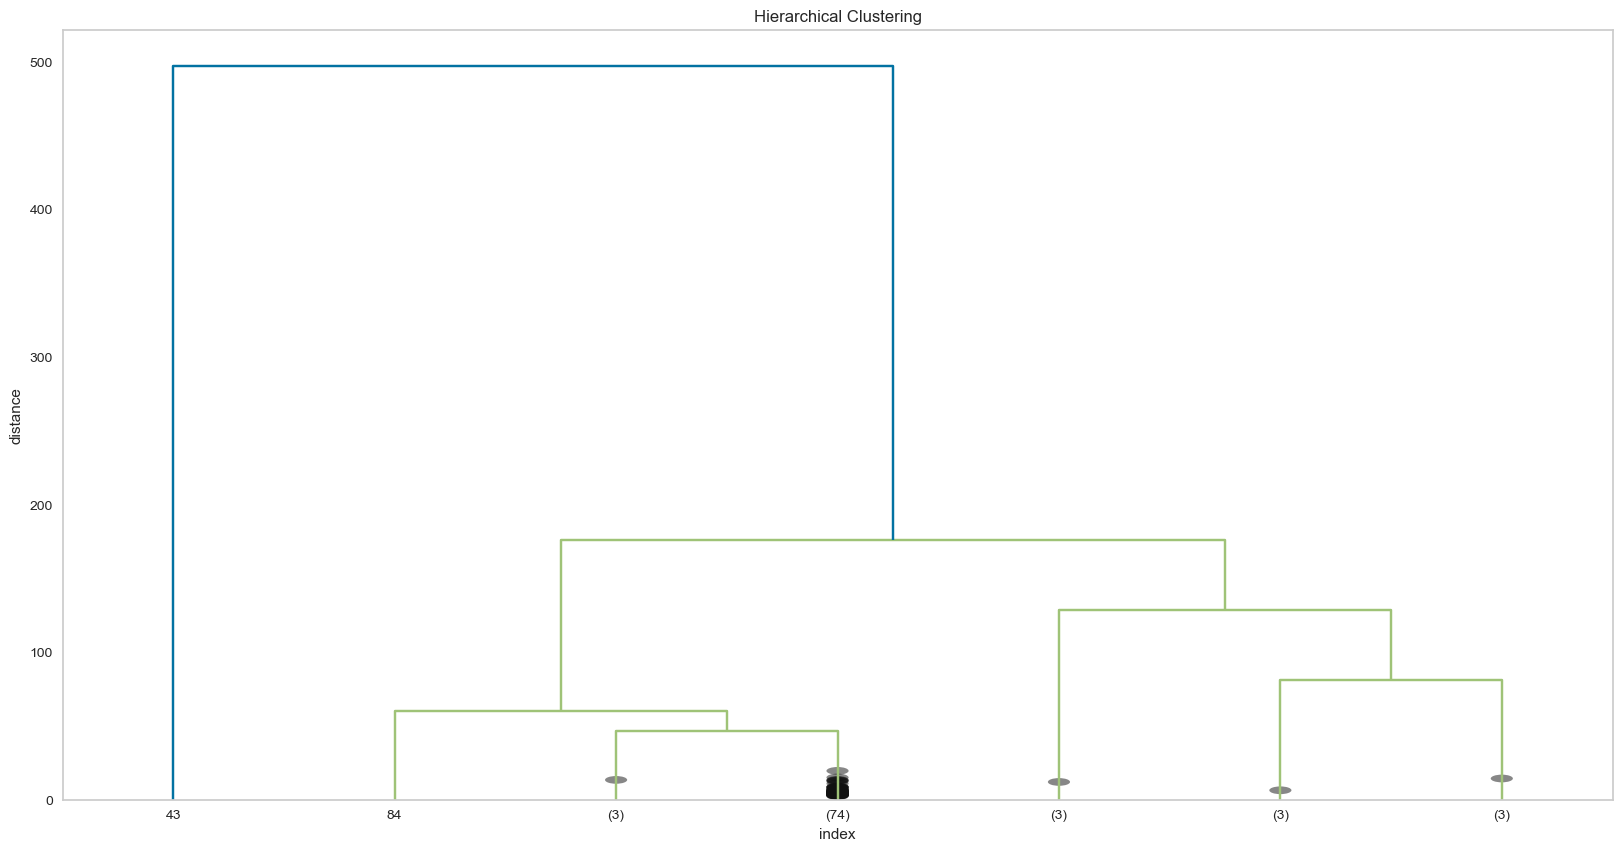

In [62]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='average',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

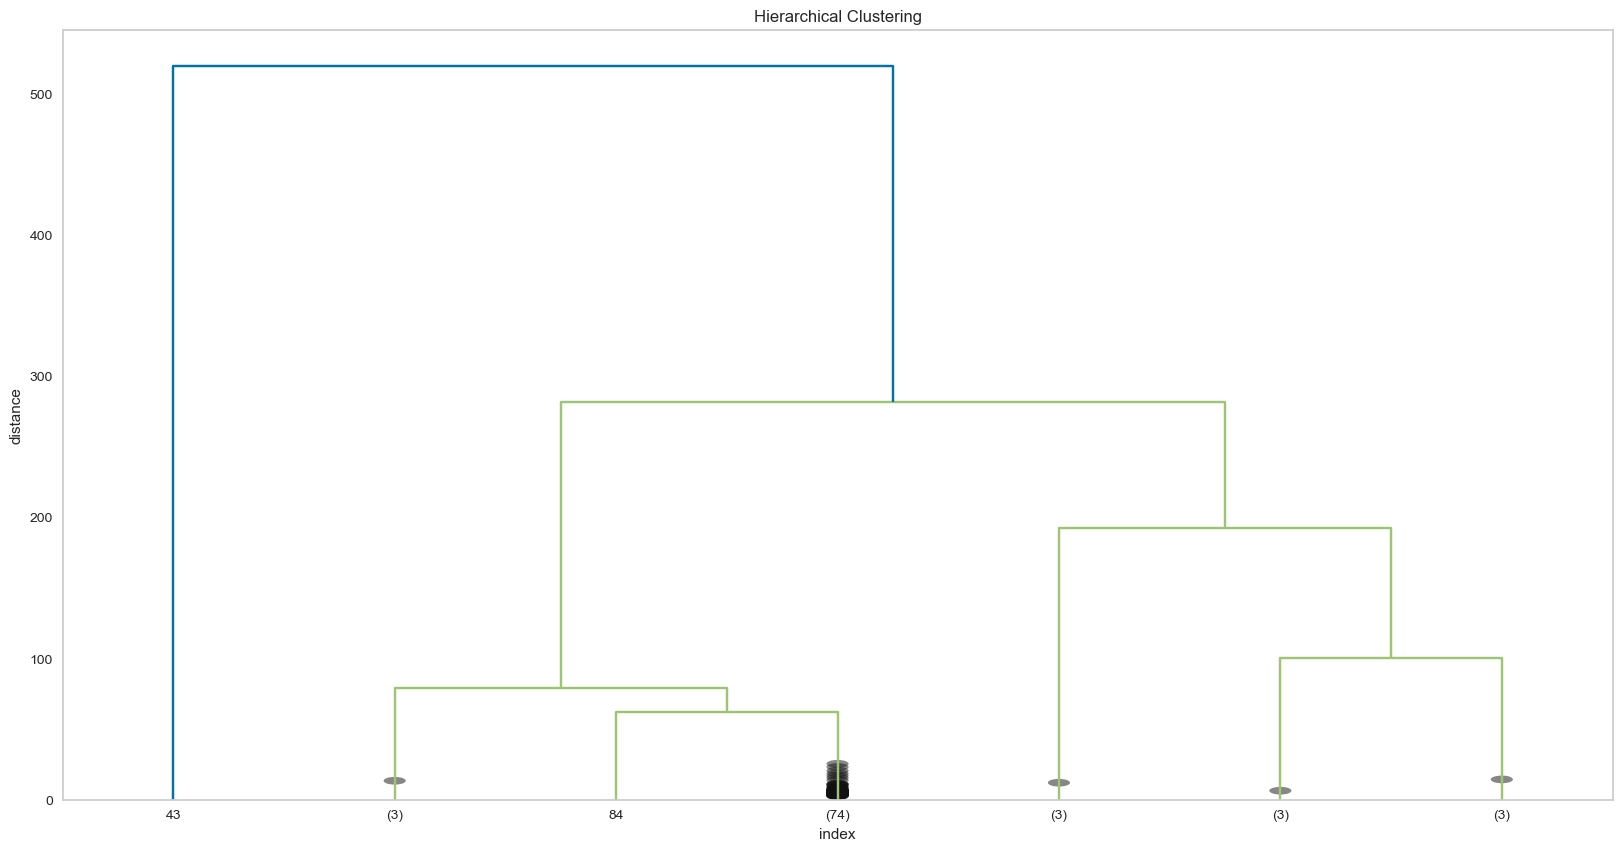

In [63]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='complete',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

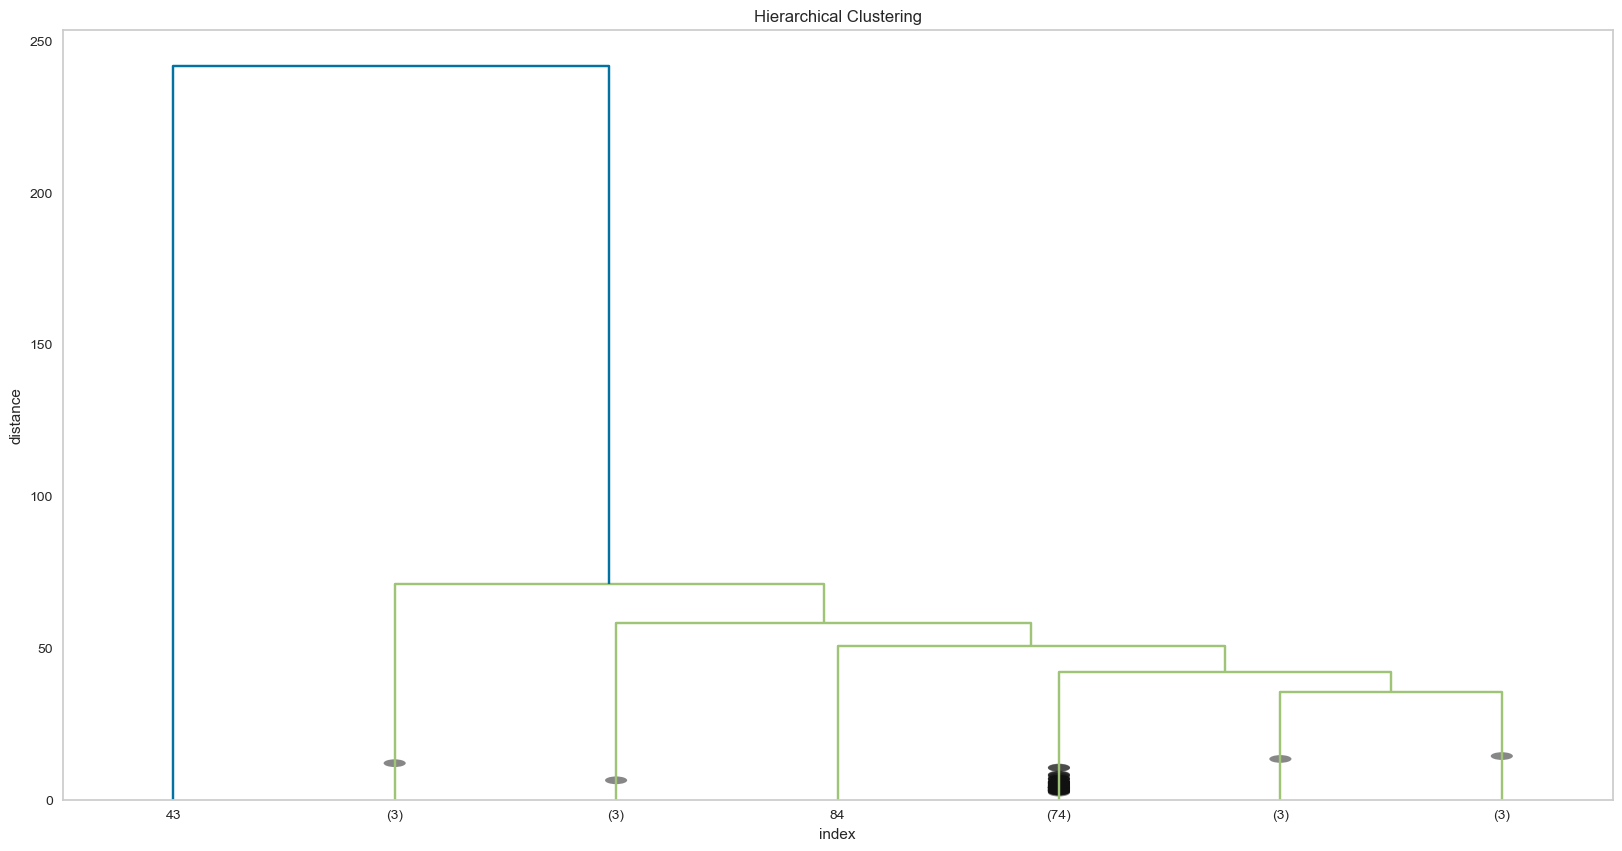

In [64]:
# Explore how many clusters to use using dendograms. Compare various linkage metrics. 

#ward linkage
Z = linkage(X_noYear,method='single',metric='euclidean')
plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(visible=None)
d = dendrogram(Z, leaf_font_size=10,
                   truncate_mode="lastp",
                   p=7,
                   show_contracted=True);

In [65]:
# Step 1: Initialize a model object
agg_clustering_noYear = AgglomerativeClustering(n_clusters=3, linkage='average',metric='euclidean')

# Step 2: Train the model using the X_test
agg_clustering_noYear.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_test_agg_clustering_noYear = agg_clustering_noYear.labels_

# Step 4: Evaluate the model performance
silhouette_score_test_agg_clustering_noYear = silhouette_score(X_noYear, y_pred_test_agg_clustering_noYear, random_state=17)

print('Silhouette score:', round(silhouette_score_test_agg_clustering_noYear))

Silhouette score: 1


In [66]:
# Save cluster labels into results dataframe
X_noYear_ac["hc_noYear_labels"] = y_pred_test_agg_clustering_noYear
X_noYear_ac.head()

Country Name Country Code  Year  \
3       Albania          ALB   0.5   
11      Algeria          DZA   0.5   
15       Angola          AGO   0.5   
26      Armenia          ARM   0.5   
41    Australia          AUS   0.5   

    A woman can be head of household in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                         
11                                                1.0                         
15                                                1.0                         
26                                                1.0                         
41                                                1.0                         

    A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                         
11                                                1.0                         
15                                                1.0                         
26                                                1.0                         
41                                                1.0                         

    A woman can get a job in the same way as a man (1=yes; 0=no)  \
3                                                 1.0              
11                                                1.0              
15                                                1.0              
26                                                1.0              
41                                                1.0              

    A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                                 
11                                                0.0                                 
15                                                1.0                                 
26                                                1.0                                 
41                                                1.0                                 

    A woman can open a bank account in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                        
11                                                1.0                        
15                                                1.0                        
26                                                1.0                        
41                                                1.0                        

    A woman can register a business in the same way as a man (1=yes; 0=no)  \
3                                                 1.0                        
11                                                1.0                        
15                                                1.0                        
26                                                1.0                        
41                                                1.0                        

    A woman can sign a contract in the same way as a man (1=yes; 0=no)  ...  \
3                                                 1.0                   ...   
11                                                0.0                   ...   
15                                                1.0                   ...   
26                                                0.0                   ...   
41                                                1.0                   ...   

    The law prohibits discrimination in employment based on gender (1=yes; 0=no)  \
3                                                 1.0                              
11                                                0.0                              
15                                                1.0                              
26                                                1.0                              
41                                                1.0      

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

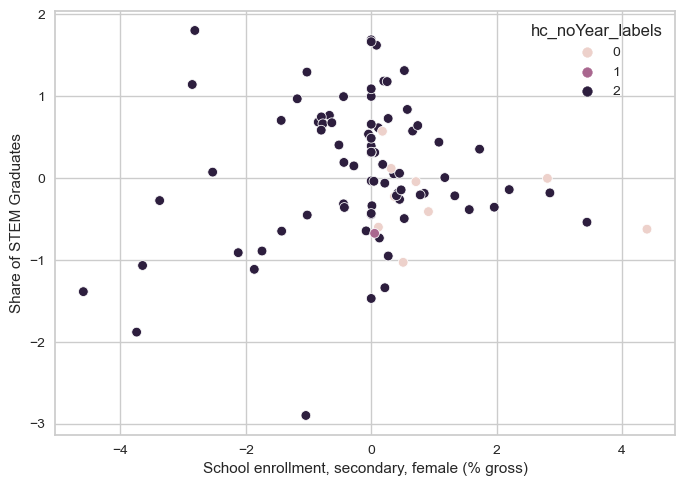

In [67]:
sns.scatterplot(data=X_noYear_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='hc_noYear_labels')

<Axes: xlabel='hc_noYear_labels', ylabel='School enrollment, secondary, female (% gross)'>

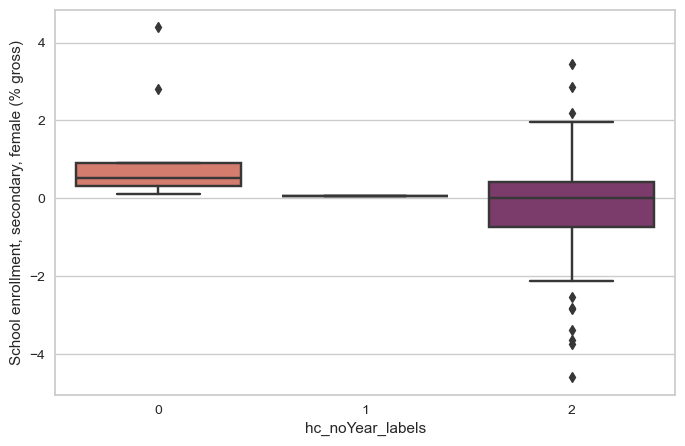

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hc_noYear_labels', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac,palette='flare')

Similarly, these clusters are overlapping and difficult to interpret. 

### Model 3: DBSCAN Using Single Year Data

In [69]:
# Step 1: Initialize a model object
dbscan = DBSCAN(eps=13, min_samples=2)

# Step 2: Train the model
dbscan.fit(X_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan.labels_

# Save to results DF
X_noYear_ac["dbscan_labels_noYear"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.742


<Axes: xlabel='A woman can get a job in the same way as a man (1=yes; 0=no)', ylabel='School enrollment, secondary, female (% gross)'>

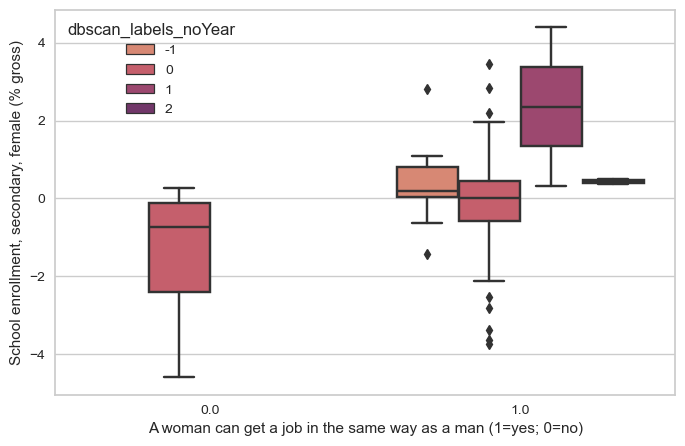

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(x='A woman can get a job in the same way as a man (1=yes; 0=no)', hue='dbscan_labels_noYear', y='School enrollment, secondary, female (% gross)', data=X_noYear_ac, palette='flare')

<Axes: xlabel='School enrollment, secondary, female (% gross)', ylabel='Share of STEM Graduates'>

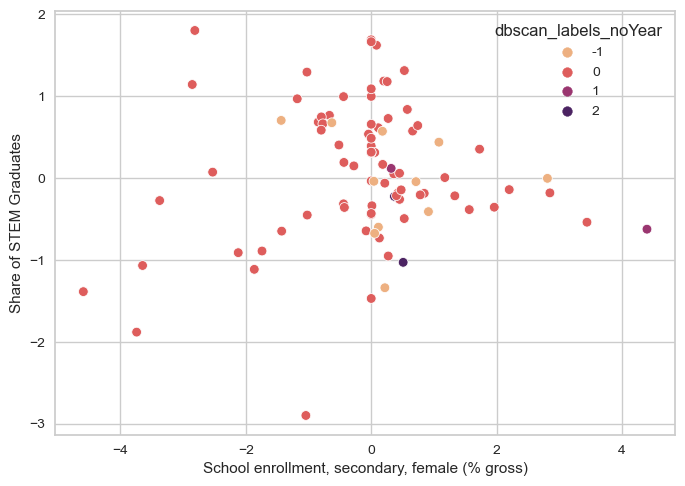

In [71]:
sns.scatterplot(data=X_noYear_ac, x='School enrollment, secondary, female (% gross)', y='Share of STEM Graduates', hue='dbscan_labels_noYear',palette='flare')

# Fertility rate, total (births per woman)

<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

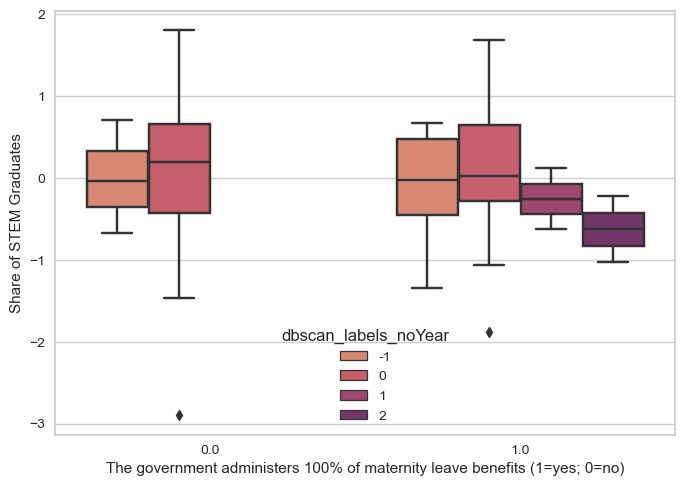

In [72]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_labels_noYear',palette='flare')

<Axes: xlabel='dbscan_labels_noYear', ylabel='Share of STEM Graduates'>

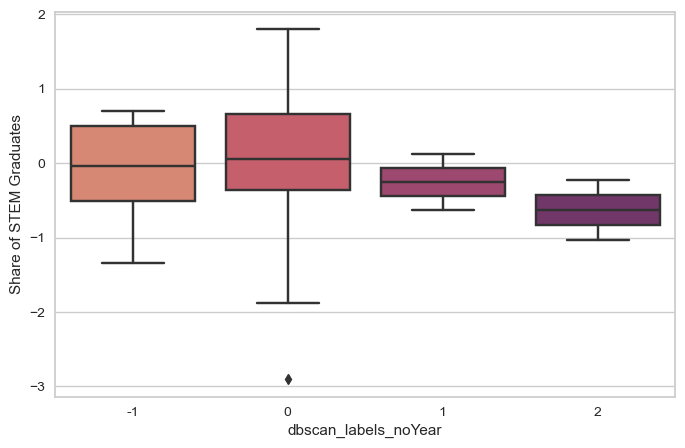

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear', y='Share of STEM Graduates', data=X_noYear_ac, palette='flare')

DBSCAN definitely seems to have more significant variation between the clusters.

<Axes: xlabel='dbscan_labels_noYear', ylabel='Length of paid maternity leave (calendar days)'>

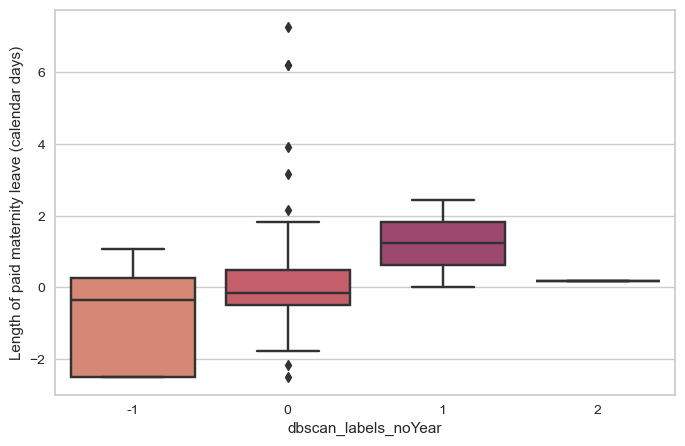

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(y='Length of paid maternity leave (calendar days)' ,x='dbscan_labels_noYear', data=X_noYear_ac,palette='flare')

# hue='Length of paid paternity leave (calendar days)',

<Axes: xlabel='dbscan_labels_noYear', ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

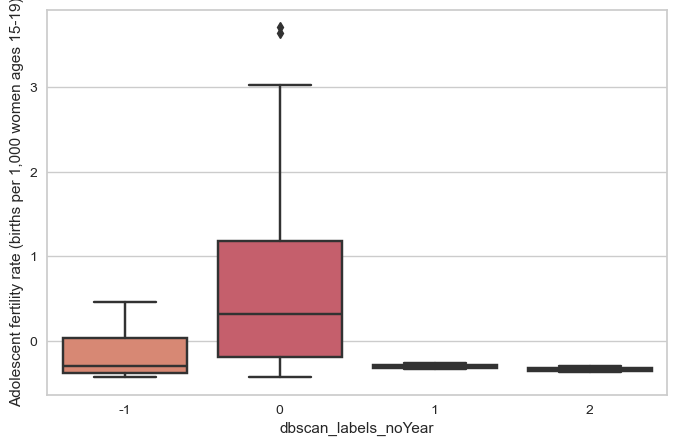

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

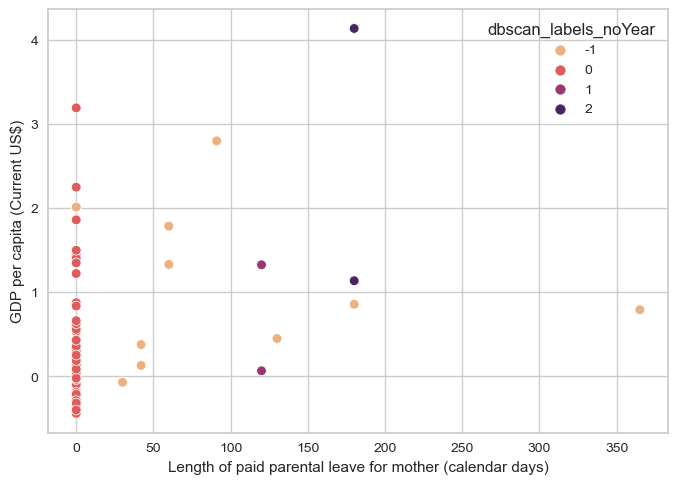

In [76]:
# sns.scatterplot(data=X_noYear_ac, x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear',palette='Set1')

sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_labels_noYear',palette='flare')


The DBSCAN is showing interesting results across the clusters - the grouping are more intuitive. 

#### New PCA Dataset from Single Year Data

In [77]:
# Step 1: Initialize a model object
pca = PCA(random_state=seed)

# Step 2: Train the model
pca_data = pca.fit(X_noYear)

# Step 3: Get explained_variance_ratio_
pca_data.explained_variance_ratio_

array([9.80489846e-01, 8.39986523e-03, 2.95910885e-03, 2.14420354e-03,
       1.18661896e-03, 1.06544406e-03, 9.36756459e-04, 4.85200647e-04,
       4.33013956e-04, 4.11458639e-04, 2.91194984e-04, 2.41050581e-04,
       1.28432556e-04, 1.18099144e-04, 1.02628131e-04, 7.71372024e-05,
       6.58359325e-05, 5.40498457e-05, 4.83649519e-05, 3.63745319e-05,
       3.52108732e-05, 3.01316383e-05, 2.89938851e-05, 2.63232420e-05,
       2.38264219e-05, 1.90361509e-05, 1.80131665e-05, 1.50984021e-05,
       1.39168407e-05, 1.34976452e-05, 1.27926836e-05, 1.20099231e-05,
       9.60031880e-06, 9.00979479e-06, 8.17973979e-06, 7.50205179e-06,
       6.94543439e-06, 6.10156700e-06, 5.10994182e-06, 4.61465082e-06,
       4.04827330e-06, 3.60954103e-06, 2.92817945e-06, 2.24004942e-06,
       2.06883868e-06, 1.51503547e-06, 1.30811465e-06, 8.79492320e-07,
       3.89001911e-07, 3.18204616e-07, 9.66928285e-08, 9.21588227e-33])

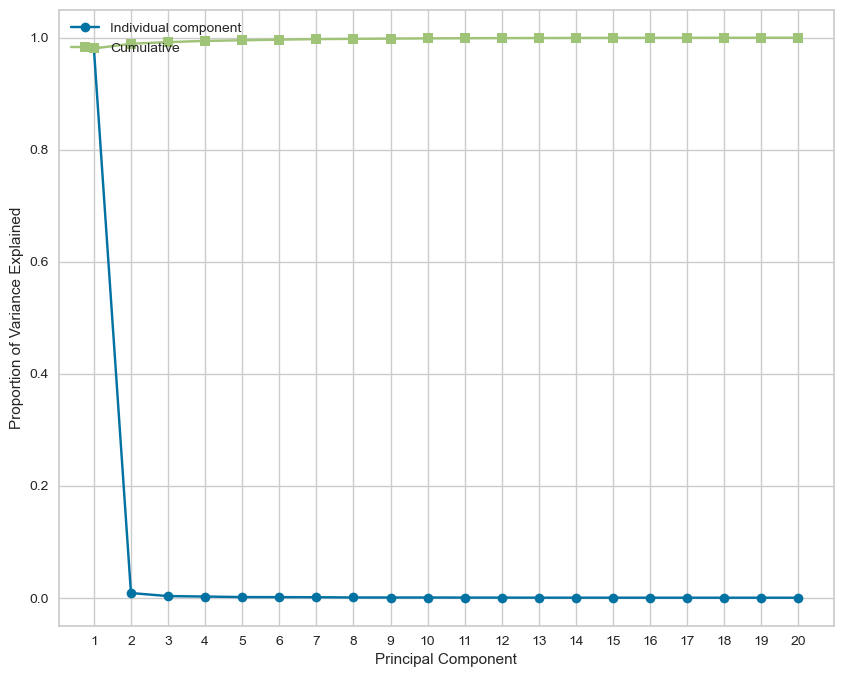

In [78]:
# Plot the variance explained ratios from the PCA to see how many components are needed to explain all of the features. 

pcidx = np.arange(1, 21)

plt.figure(figsize=(10, 8))

plt.plot(pcidx, pca_data.explained_variance_ratio_[:20], '-o', label='Individual component')
plt.plot(pcidx, np.cumsum(pca_data.explained_variance_ratio_[:20]), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(pcidx)
plt.legend(loc=2)

In [79]:
# The plot appears to flatten after 5 components. Create a new dataframe that is a PCA subset with n_components=5

n_components = 5
pca = PCA(n_components=n_components, random_state=seed)
X_PCA_noYear = pd.DataFrame(pca.fit_transform(X_noYear), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5'], index=X_noYear.index)
X_PCA_noYear

PC1        PC2       PC3        PC4       PC5
3    -25.378176  -2.647160 -0.891827  -0.790401 -1.675755
11   -25.377103  -1.515683 -0.580339  -0.541868  0.286411
15   -25.420928  -2.314844 -0.895464  -1.119300  5.412533
26   -25.371700  -2.413755 -0.588597  -0.655367 -0.199074
41   -25.275255   2.807319  0.055117   0.144133 -4.165441
...         ...        ...       ...        ...       ...
1028 -25.220262   9.572080 -0.356415   2.058770 -3.527166
1036 -24.877106  55.537172  6.999185 -16.443123  1.052219
1051 -25.355960   0.358392 -1.070241   1.329799 -0.141783
1063 -25.400615  -2.484938 -0.597555  -1.278376  2.584376
1070 -25.392421  -2.384517 -0.732974  -1.073147  3.477545

[88 rows x 5 columns]

#### DBSCAN Using Single Year Data & PCA 

In [80]:
# Tune parameters & fit to X_PCA data. eps=12, min_samples=10

# Step 1: Initialize a model object
dbscan_PCA_noYear = DBSCAN(eps=13, min_samples=2)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_pca_labels_noYear_PCA"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.757


<Axes: xlabel='dbscan_pca_labels_noYear_PCA', ylabel='Share of STEM Graduates'>

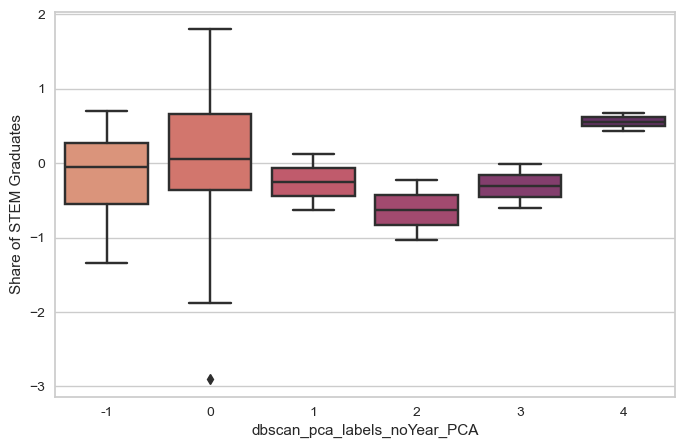

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels_noYear_PCA', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

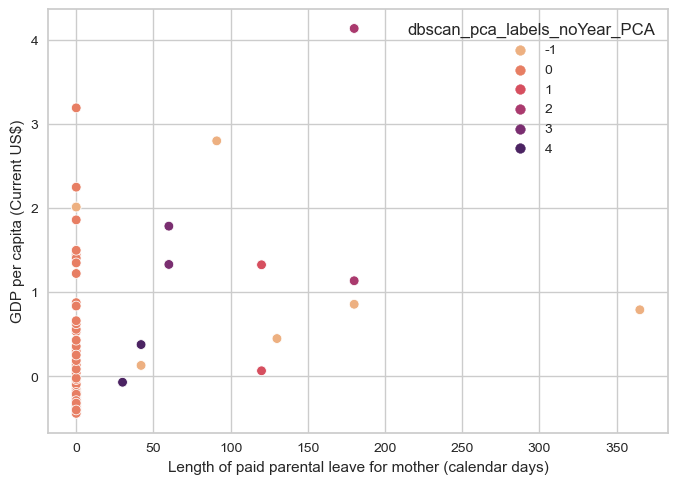

In [82]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')


<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Length of paid maternity leave (calendar days)'>

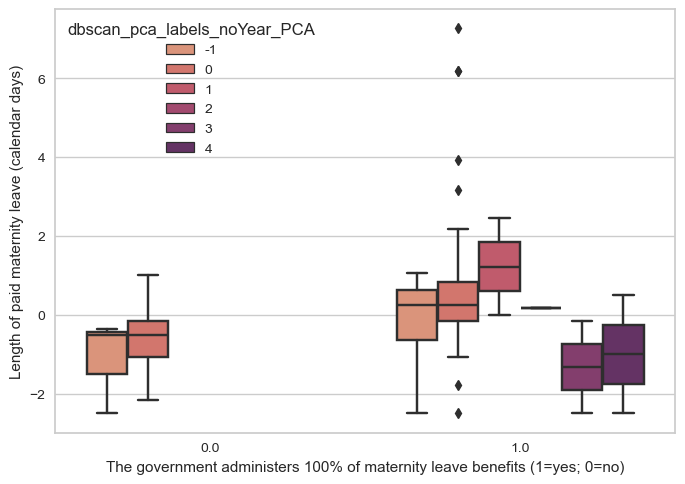

In [83]:
sns.boxplot(data=X_noYear_ac, y='Length of paid maternity leave (calendar days)', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')

<Axes: xlabel='Share of STEM Graduates', ylabel='School enrollment, secondary, female (% gross)'>

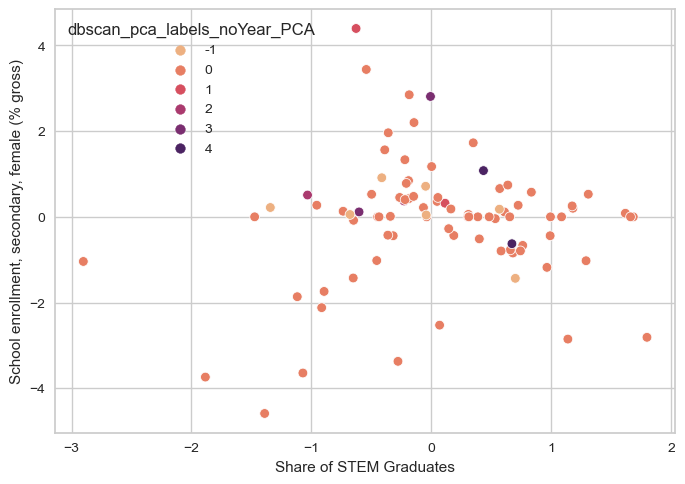

In [84]:
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='School enrollment, secondary, female (% gross)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')

### Model 3: Finetune PCA, Single Year Data

In [85]:
# Defining the list of hyperparameters to try
eps_list=np.arange(start=2, stop=150, step=1)
min_sample_list=np.arange(start=2, stop=100, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data = []
silhouette_scores = []

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X_PCA_noYear)))>3):
            sil_score=silhouette_score(X_PCA_noYear, db.fit_predict(X_PCA_noYear))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores.append(sil_score)
        silhouette_scores_data.append(trial_parameters)

# Finding out the best hyperparameters with highest Score
df = pd.DataFrame()
df['score'] = silhouette_scores
df['paramaters'] = silhouette_scores_data
df = df.sort_values(by='score',ascending=False)

In [86]:
df.head(-25)

score            paramaters
76  0.868059  eps:57 min_sample :3
69  0.868059  eps:54 min_sample :2
63  0.868059  eps:51 min_sample :2
64  0.868059  eps:51 min_sample :3
65  0.868059  eps:52 min_sample :2
67  0.868059  eps:53 min_sample :2
68  0.868059  eps:53 min_sample :3
66  0.868059  eps:52 min_sample :3
70  0.868059  eps:54 min_sample :3
71  0.868059  eps:55 min_sample :2
72  0.868059  eps:55 min_sample :3
73  0.868059  eps:56 min_sample :2
74  0.868059  eps:56 min_sample :3
75  0.868059  eps:57 min_sample :2
53  0.847814  eps:46 min_sample :2
45  0.847814  eps:42 min_sample :2
46  0.847814  eps:42 min_sample :3
47  0.847814  eps:43 min_sample :2
48  0.847814  eps:43 min_sample :3
49  0.847814  eps:44 min_sample :2
50  0.847814  eps:44 min_sample :3
51  0.847814  eps:45 min_sample :2
52  0.847814  eps:45 min_sample :3
58  0.847814  eps:48 min_sample :3
54  0.847814  eps:46 min_sample :3
55  0.847814  eps:47 min_sample :2
56  0.847814  eps:47 min_sample :3
57  0.847814  eps:48 min_sample :2
59  0.847814  eps:49 min_sample :2
60  0.847814  eps:49 min_sample :3
61  0.847814  eps:50 min_sample :2
62  0.847814  eps:50 min_sample :3
39  0.827223  eps:39 min_sample :2
44  0.827223  eps:41 min_sample :3
43  0.827223  eps:41 min_sample :2
42  0.827223  eps:40 min_sample :3
41  0.827223  eps:40 min_sample :2
40  0.827223  eps:39 min_sample :3
38  0.827223  eps:38 min_sample :3
37  0.827223  eps:38 min_sample :2
36  0.827223  eps:37 min_sample :3
35  0.827223  eps:37 min_sample :2
34  0.827223  eps:36 min_sample :3
33  0.827223  eps:36 min_sample :2
30  0.807420  eps:34 min_sample :3
27  0.807420  eps:33 min_sample :2
29  0.807420  eps:34 min_sample :2
28  0.807420  eps:33 min_sample :3
31  0.807420  eps:35 min_sample :2
32  0.807420  eps:35 min_sample :3
25  0.797821  eps:32 min_sample :2
23  0.797821  eps:31 min_sample :2

In [87]:
 # Tune parameters & fit to X_PCA data. eps=12, min_samples=10

# Step 1: Initialize a model object
dbscan_PCA_noYear = DBSCAN(eps=43, min_samples=3)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_pca_labels_noYear_PCA"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.848


<Axes: xlabel='dbscan_pca_labels_noYear_PCA', ylabel='Share of STEM Graduates'>

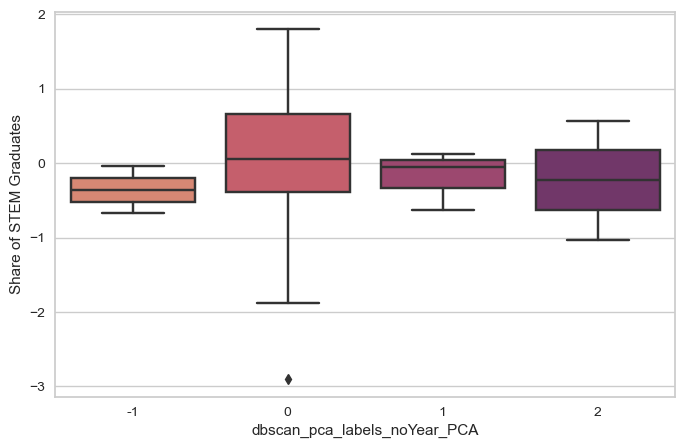

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_pca_labels_noYear_PCA', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

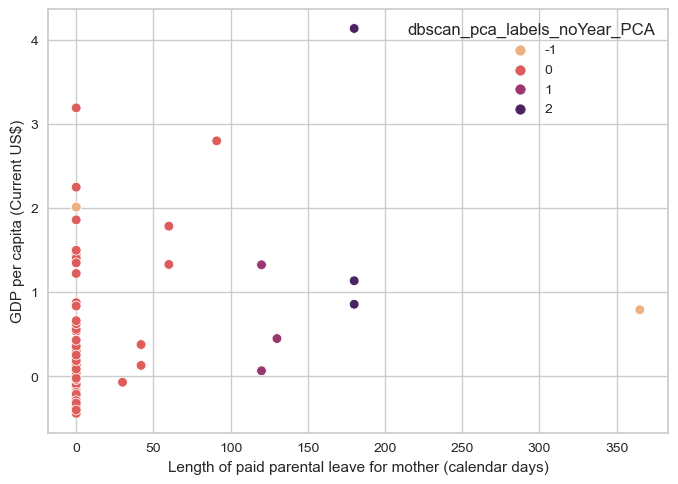

In [89]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_pca_labels_noYear_PCA',palette='flare')


#### Hypertune DBSCAN

In [90]:
def GridSearch(parameters, data):
    best_score = -np.inf
    best_params = {'eps': None, 'min_samples': None}

    for eps in parameters['eps']:
        for min_samples in parameters['min_samples']:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
            labels = dbscan.labels_
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            num_noise = list(labels).count(-1)
            if len(set(labels)) > 2 and np.count_nonzero(labels != -1) > 0:
                            score = silhouette_score(data, labels)
                            if score > best_score:
                                best_score = score
                                best_params['eps'] = eps
                                best_params['min_samples'] = min_samples


    return best_params

In [91]:
eps_list=np.arange(start=2, stop=150, step=1)
min_sample_list=np.arange(start=2, stop=100, step=1)

parameters = {'eps': eps_list, 
              'min_samples': min_sample_list,
              }

GridSearch(parameters,X_PCA_noYear)

{'eps': 51, 'min_samples': 2}

In [92]:
# Step 1: Initialize a model object

params = GridSearch(parameters,X_PCA_noYear)
min_samples = params['min_samples']
eps = params['eps']

dbscan_PCA_noYear = DBSCAN(min_samples=min_samples,eps=eps)

# Step 2: Train the model
dbscan_PCA_noYear.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_noYear.labels_

# Save to results DF
X_noYear_ac["dbscan_labels_noYear_PCA_hypertuned"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))


Silhouette score: 0.868


<Axes: xlabel='Share of STEM Graduates', ylabel='School enrollment, secondary, female (% gross)'>

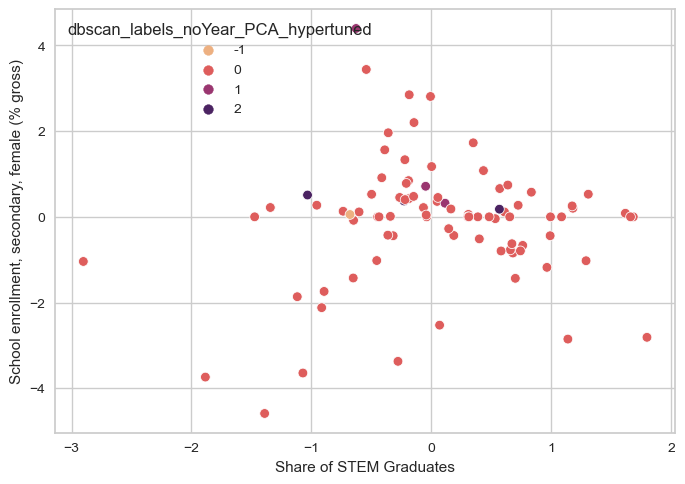

In [93]:
# palette = 
#     [0.0, '#F6BDB4'],
#     [0.33, '#B2675A'],
#     [0.66, '#843b23'],
#     [1.0, '#403533']  
# ]
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

<Axes: xlabel='dbscan_labels_noYear_PCA_hypertuned', ylabel='Share of STEM Graduates'>

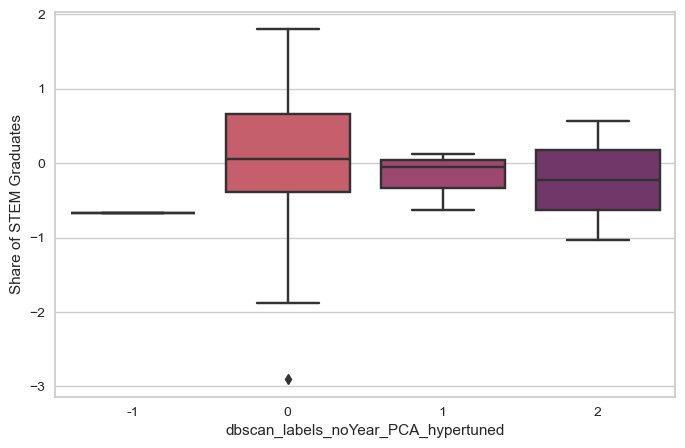

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_labels_noYear_PCA_hypertuned', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

<Axes: xlabel='Adolescent fertility rate (births per 1,000 women ages 15-19)', ylabel='School enrollment, secondary, female (% gross)'>

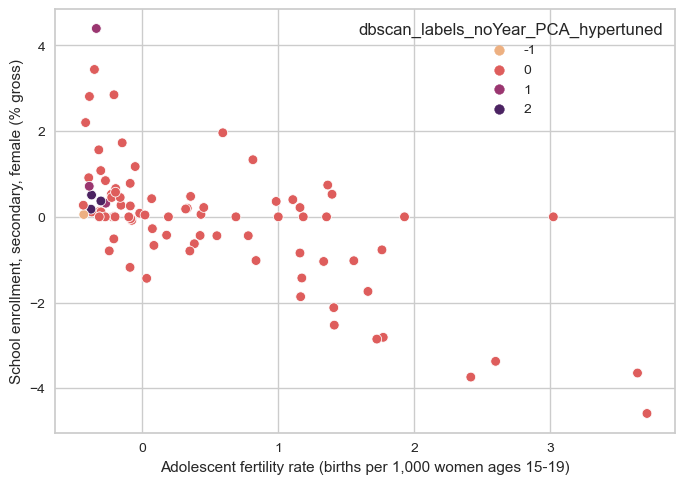

In [95]:
sns.scatterplot(data=X_noYear_ac, x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='School enrollment, secondary, female (% gross)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

<Axes: xlabel='Length of paid parental leave for mother (calendar days)', ylabel='GDP per capita (Current US$)'>

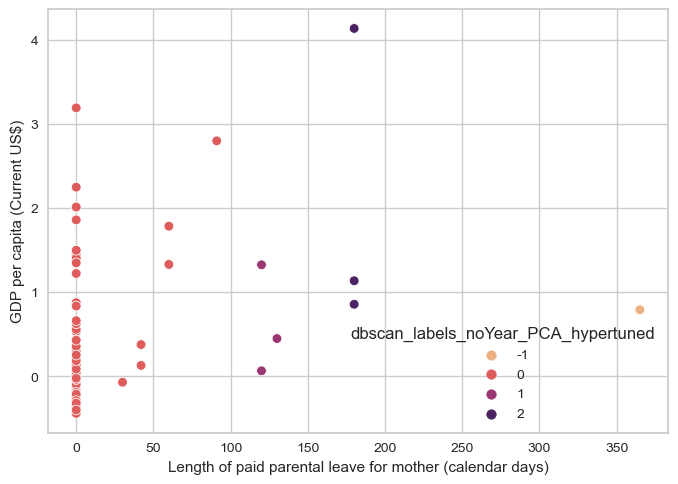

In [96]:
sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')


<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

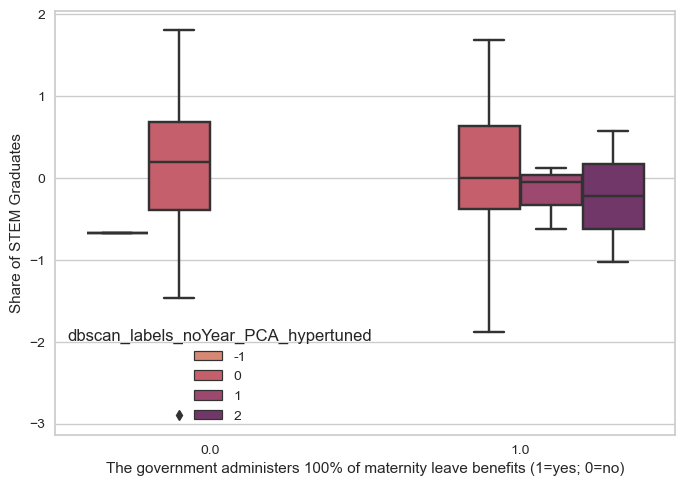

In [97]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_labels_noYear_PCA_hypertuned',palette='flare')

### Model Comparison

While none of the models show very clear clusters, the DBSCAN clusters seem to have the most "distance" between them. 

The hypertuned DBSCAN model has only 2 clusters, from which it's hard to draw conclusions. 

I am choosing to use the DBSCAN model with a lower silhoutte score that shows more clusters, which might make drawing conclusions easier. 

### Model 3: Final Model Visualizations

In [98]:
# dbscan_PCA_noYear = DBSCAN(eps=114, min_samples=83)

dbscan_PCA_final = DBSCAN(eps=43, min_samples=3)
# eps:41 min_sample :2

# Step 2: Train the model
dbscan_PCA_final.fit(X_PCA_noYear)

# Step 3: Get predictions (cluster assignments)
y_pred_train_dbscan = dbscan_PCA_final.labels_

# Save to results DF
X_noYear_ac["dbscan_final"] = y_pred_train_dbscan

# Step 4: Evaluate the model performance
silhouette_score_train_dbscan = silhouette_score(X_PCA_noYear, y_pred_train_dbscan)

print('Silhouette score:', round(silhouette_score_train_dbscan, 3))

Silhouette score: 0.848


<Axes: xlabel='dbscan_final', ylabel='Share of STEM Graduates'>

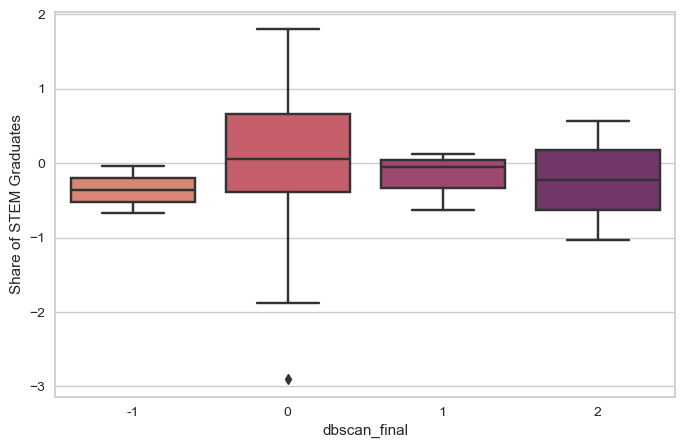

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x='dbscan_final', y='Share of STEM Graduates', data=X_noYear_ac,palette='flare')

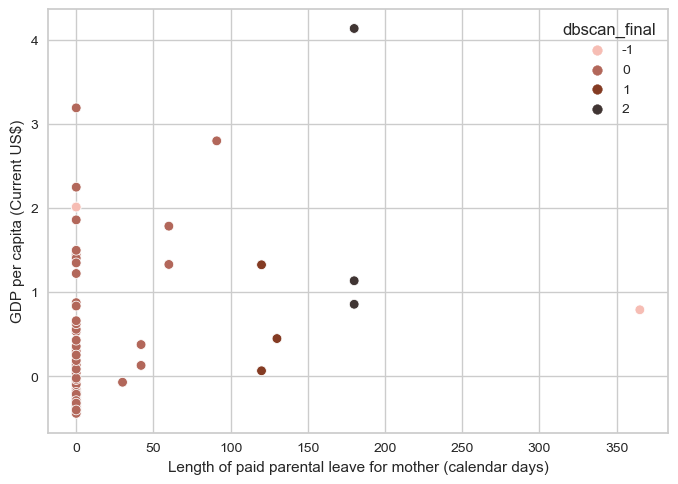

In [100]:

colors = ['#F6BDB4','#B2675A','#843b23','#403533']

ax = sns.scatterplot(data=X_noYear_ac, y='GDP per capita (Current US$)', x='Length of paid parental leave for mother (calendar days)', hue='dbscan_final',palette=colors)
ax.figure.set_facecolor('none')
ax.set_facecolor('none')

<Axes: xlabel='Length of paid paternity leave (calendar days)', ylabel='Share of STEM Graduates'>

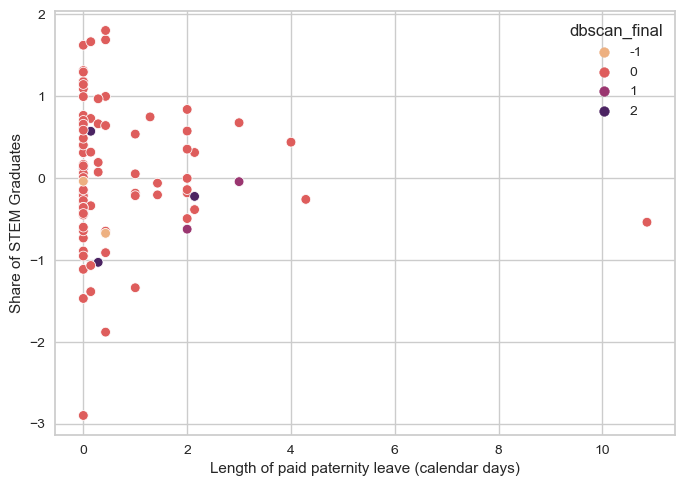

In [101]:
sns.scatterplot(data=X_noYear_ac, y='Share of STEM Graduates', x='Length of paid paternity leave (calendar days)', hue='dbscan_final',palette='flare')

<Axes: xlabel='The government administers 100% of maternity leave benefits (1=yes; 0=no)', ylabel='Share of STEM Graduates'>

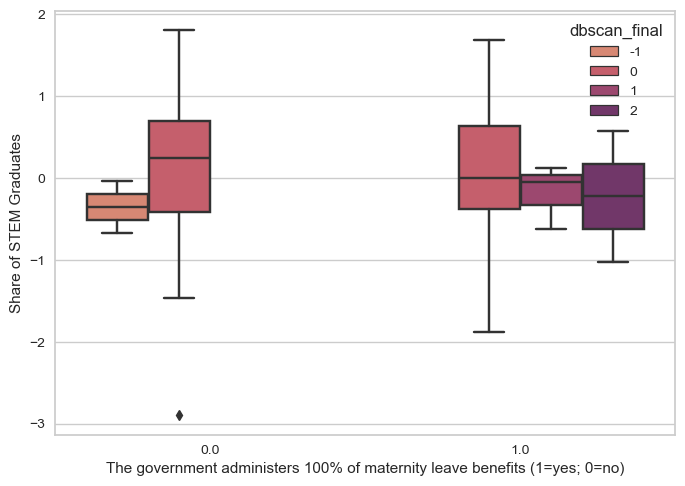

In [102]:
sns.boxplot(data=X_noYear_ac, y='Share of STEM Graduates', x='The government administers 100% of maternity leave benefits (1=yes; 0=no)', hue='dbscan_final',palette='flare')

<Axes: xlabel='Share of STEM Graduates', ylabel='Length of paid paternity leave (calendar days)'>

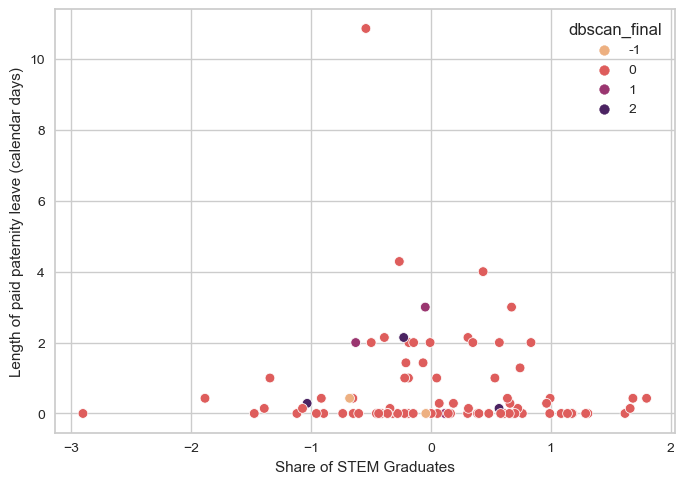

In [103]:
sns.scatterplot(data=X_noYear_ac, x='Share of STEM Graduates', y='Length of paid paternity leave (calendar days)', hue='dbscan_final',palette='flare')

<Axes: xlabel='Paid leave is available to fathers (1=yes; 0=no)', ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

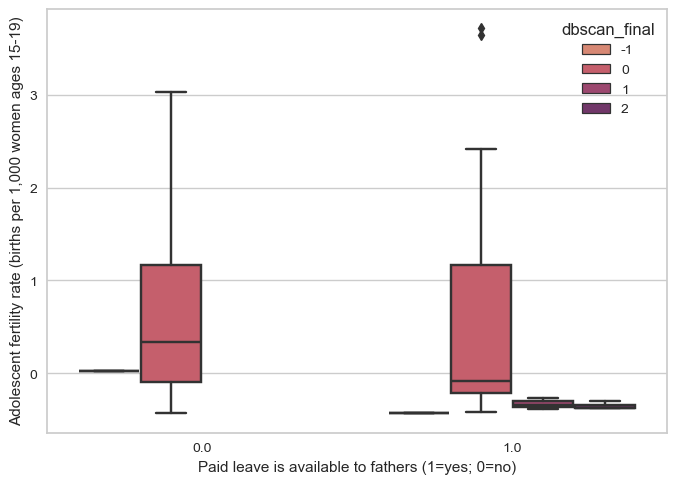

In [104]:
# Adolescent fertility rate (births per 1,000 women ages 15-19)

sns.boxplot(data=X_noYear_ac, x='Paid leave is available to fathers (1=yes; 0=no)', y='Adolescent fertility rate (births per 1,000 women ages 15-19)', hue='dbscan_final',palette='flare')

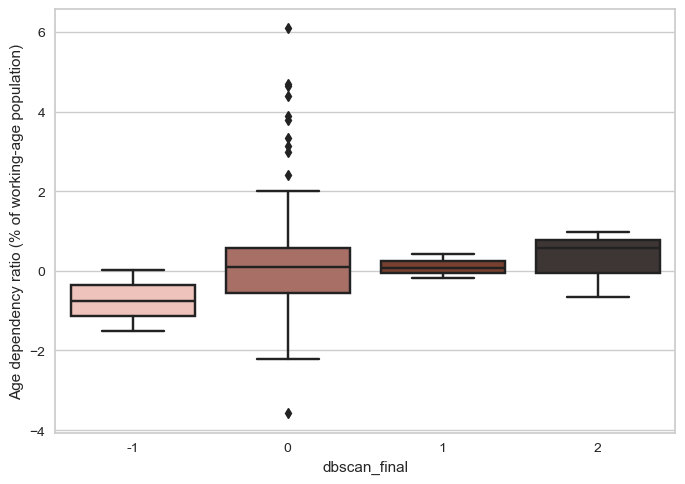

In [105]:
colors = ['#F6BDB4','#B2675A','#843b23','#403533']

ax = sns.boxplot(data=X_noYear_ac, y='Age dependency ratio (% of working-age population)', x='dbscan_final', palette=colors)
ax.figure.set_facecolor('none')
ax.set_facecolor('none')

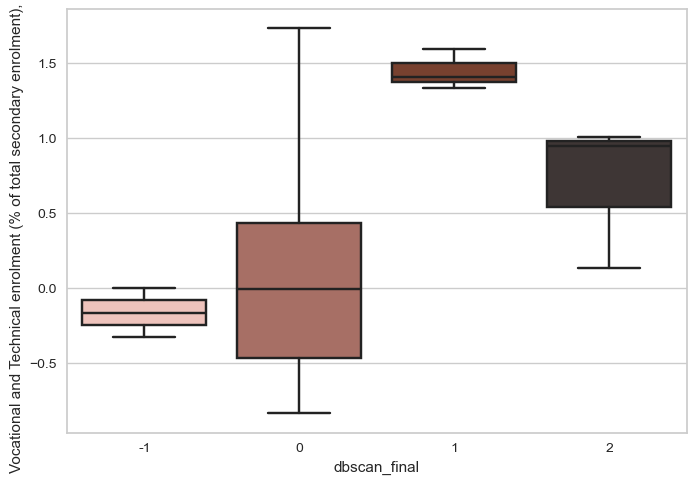

In [106]:
colors = ['#F6BDB4','#B2675A','#843b23','#403533']

ax = sns.boxplot(data=X_noYear_ac, y='Vocational and Technical enrolment (% of total secondary enrolment), total', x='dbscan_final', palette=colors)
ax.figure.set_facecolor('none')
ax.set_facecolor('none')

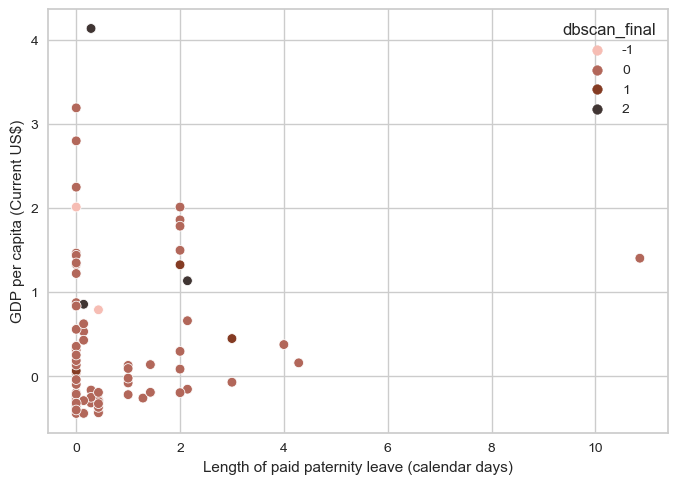

In [107]:
colors = ['#F6BDB4','#B2675A','#843b23','#403533']

ax = sns.scatterplot(data=X_noYear_ac, x='Length of paid paternity leave (calendar days)', y='GDP per capita (Current US$)', hue='dbscan_final', palette=colors)
ax.figure.set_facecolor('none')
ax.set_facecolor('none')

In [108]:
X_noYear_ac.columns

Index(['Country Name', 'Country Code', 'Year',
       'A woman can be head of household in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can register a business in the same way as a man (1=yes; 0=no)',
       'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
       'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
       'A woman can work at night in the same way as a man (1=yes; 0=no)',
       'A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)',
       'A woman can work in an industrial job in the same way as a man (1=yes; 0=no)',
       'A woman has the same rights to remarry as 

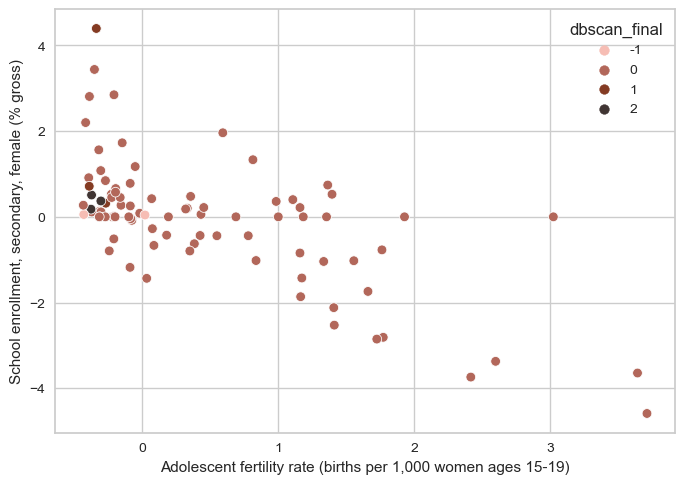

In [109]:
colors = ['#F6BDB4','#B2675A','#843b23','#403533']

ax = sns.scatterplot(data=X_noYear_ac, y='School enrollment, secondary, female (% gross)', x='Adolescent fertility rate (births per 1,000 women ages 15-19)', hue='dbscan_final',palette=colors)
ax.figure.set_facecolor('none')
ax.set_facecolor('none')

In [110]:
X_noYear_ac['Country Name'] = X_noYear_withCountry['Country Name']
X_noYear_ac

Country Name Country Code  Year  \
3                Albania          ALB   0.5   
11               Algeria          DZA   0.5   
15                Angola          AGO   0.5   
26               Armenia          ARM   0.5   
41             Australia          AUS   0.5   
...                  ...          ...   ...   
1028      United Kingdom          GBR   0.5   
1036       United States          USA   0.5   
1051            Viet Nam          VNM   0.5   
1063  West Bank and Gaza          PSE   0.5   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                0.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
3                                                   1.0              
11                                                  1.0              
15                                                  1.0              
26                                                  1.0              
41                                                  1.0              
...                                                 ...              
1028                                                1.0              
1036                                                1.0              
1051                                                1.0              
1063                                                0.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                                 
11                                                  0.0                                 
15                                                  1.0                                 
26                                                  1.0                                 
41                                                  1.0                                 
...                                                 ...                                 
1028                                 

In [111]:
import geopandas as gpd

world = gpd.read_file('ne_110m_admin_0_countries');
world = gpd.GeoDataFrame(world)

world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  

[5 rows x 169 columns]

In [112]:
merged_data = pd.read_csv('country_index.csv')

merged_data[merged_data['Year']==0.5]

Country Name Country Code  Year  \
3                Albania          ALB   0.5   
11               Algeria          DZA   0.5   
15                Angola          AGO   0.5   
26               Armenia          ARM   0.5   
41             Australia          AUS   0.5   
...                  ...          ...   ...   
1028      United Kingdom          GBR   0.5   
1036       United States          USA   0.5   
1051            Viet Nam          VNM   0.5   
1063  West Bank and Gaza          PSE   0.5   
1070            Zimbabwe          ZWE   0.5   

      A woman can be head of household in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                1.0                         
1070                                                1.0                         

      A woman can choose where to live in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                         
11                                                  1.0                         
15                                                  1.0                         
26                                                  1.0                         
41                                                  1.0                         
...                                                 ...                         
1028                                                1.0                         
1036                                                1.0                         
1051                                                1.0                         
1063                                                0.0                         
1070                                                1.0                         

      A woman can get a job in the same way as a man (1=yes; 0=no)  \
3                                                   1.0              
11                                                  1.0              
15                                                  1.0              
26                                                  1.0              
41                                                  1.0              
...                                                 ...              
1028                                                1.0              
1036                                                1.0              
1051                                                1.0              
1063                                                0.0              
1070                                                1.0              

      A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)  \
3                                                   1.0                                 
11                                                  0.0                                 
15                                                  1.0                                 
26                                                  1.0                                 
41                                                  1.0                                 
...                                                 ...                                 
1028                                 

In [113]:
merged_data = pd.read_csv('country_index.csv')
import plotly.express as px

merged_data_2015 = merged_data[merged_data['Year']==0.5]

# Merge 'world' dataframe with 'total_production_df' on country names
merged = world.set_index('ADM0_A3').join(merged_data_2015.set_index('Country Code'))

colorscales = [
    [0.0, '#CF8679'], 
    [1.0, '#CF8679']  
]
    
# Create a choropleth map
fig = px.choropleth(merged,
                    geojson=merged.geometry.__geo_interface__,
                    locations=merged.index, 
                    color='Year', 
                    color_continuous_scale=colorscales,
                    # labels={'Total Oil Production Value(2001-2022)': "Total Oil Production by Country"} 
                   )

# Update layout settings of the map
fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)', 
        plot_bgcolor='rgba(0,0,0,0)' ,
    geo=dict(
        bgcolor='rgba(0,0,0,0)' )
)
fig.update(layout_coloraxis_showscale=False)

# Display the figure
fig.show()

In [116]:
merged_data = pd.read_csv('country_index.csv')
import plotly.express as px

plot_data = X_noYear_ac[['Country Name', 'Country Code','dbscan_final']]

# Merge 'world' dataframe with 'total_production_df' on country names
merged = world.set_index('ADM0_A3').join(plot_data.set_index('Country Code'))

# merged = world.set_index('ADM0_A3').join(merged_data_2015.set_index('Country Code'))

colorscales = [
    [0.0, '#F6BDB4'],
    [0.33, '#B2675A'],
    [0.66, '#843b23'],
    [1.0, '#403533']  
]

fig = px.choropleth(merged,
                    geojson=merged.geometry.__geo_interface__,
                    locations=merged.index,
                    color='dbscan_final',
                    color_continuous_scale=colorscales,
                    )
# Update layout settings of the map
fig.update_layout(
    margin={"r":0, "t":0, "l":0, "b":0},
    coloraxis_colorbar={
        'title': "",
        'orientation': "v",
        'len': 0.5,
        'tickvals': [-1, 0, 1, 2, 3],
        'ticktext': ["Cluster -1", "Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"],
    },
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)' ,
    geo=dict(
    bgcolor='rgba(0,0,0,0)' 
))
fig.update_layout(coloraxis_showscale=True)

# Display the figure
fig.show()


In [117]:
plot_data[plot_data['dbscan_final']!=0]
plot_data.to_csv('clusterresults.csv')

### References

Seaborn
- https://seaborn.pydata.org/tutorial/color_palettes.html

Class Materials: 
- Homework 1
- Homework 2
- UnsupervisedLearning_Clustering.pdf
- Clustering - Kmeans Exercise
- HierarchicalClustering
- Lab 9 Solutions
- Principal ComponentAnalysis_PCA

SkLearn
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

DBSCAN Research
- https://www.newhorizons.com/resources/blog/dbscan-vs-kmeans-a-guide-in-python#:~:text=DBSCAN%20stands%20for%20Density%2DBased,any%20cluster%20are%20considered%20noise.


Other research:
- https://stackoverflow.com/questions/60056848/how-to-get-rid-of-the-white-background-of-choropleth